<center>

# __Introduction to Interpretable Fuzzy Sets and Systems__

<br>

Dr. [Jose Maria Alonso-Moral](https://citius.gal/team/jose-maria-alonso-moral/)

_Centro Singular de Investigación en Tecnoloxías Intelixentes (CiTIUS)_

_Universidade de Santiago de Compostela_

_ETSE-USC, Campus Vida, Santiago de Compostela, Spain_

<br>

__4 February 2025__
 
__Explainable and Trustworthy AI__

<br>

![MIA.png](MIA.png)

</center>

# 1. **Introduction**

This interactive tutorial includes supplementary material for the first XAI in the Lab hands-on session (I1. "Introduction to Fuzzy Sets and Systems") in the Subject **Explainable and Trustworthy AI** (Master in Artificial Intelligence). The session is leaded by [Jose M. Alonso-Moral](https://citius.gal/team/jose-maria-alonso-moral) at USC, [Alejandro Mayorga Redondo](https://pdi.udc.es/es/File/Pdi/TB3RL) at UDC, and the Local Teacher at UVigo.

# 2. **Settings**

This section is aimed for importing files, installing software and loading the required Python libraries.

In [1]:
## this code is developed by Jose Maria Alonso-Moral
import os

# Setting Java8 is needed for compatibility with JFML (IEEE standard 1855-2016)
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!java -version

openjdk version "1.8.0_432"
OpenJDK Runtime Environment (build 1.8.0_432-8u432-ga~us1-0ubuntu2~22.04-ga)
OpenJDK 64-Bit Server VM (build 25.432-bga, mixed mode)


In [2]:
## this code is developed by Jose Maria Alonso-Moral
# Libraries installation
os.system("pip install platypus-opt --quiet")

0

In [3]:
## this code is developed by Jose Maria Alonso-Moral
import warnings
warnings.filterwarnings('ignore')

# Loading plot tool (for ploting fuzzy sets and rules)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import SVG, HTML, display

# Loading csv package for reading data files
import pandas as pd

# Loading lib to support handling of confusion matrix
import numpy as np

# Loading lib to support handling of iterators
import itertools

# Loading some models from sklearn for performance comparison
import sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.tree import export_text

# Loading JFML library
from py4j.java_gateway import JavaGateway
from py4jfml.Py4Jfml import Py4jfml

# opening the JVM and Server for accessing to JFML
gateway = JavaGateway()

In [4]:
## this code is developed by Jose Maria Alonso-Moral
# auxiliar function
def plot_png_file(f):
  plt.figure(figsize=[15,10])
  img = mpimg.imread(f)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

# 3. **Building interpretable fuzzy rule based systems**

In this section, you will learn how to handle a fuzzy system which is generated with [GUAJE](https://demos.citius.usc.es/GuajeOnline/) software and then exported to the IEEE standard format associated to [JFML](http://www.uco.es/JFML/software).
Regarding GUAJE, please take a look at [GUAJE-code](https://gitlab.citius.usc.es/jose.alonso/guaje/), but also examples provided with the following book:

* J. M. Alonso, C. Castiello, L. Magdalena, C. Mencar, C. (2021) *Explainable Fuzzy Systems: Paving the way from Interpretable Fuzzy Systems to Explainable AI Systems*, Studies in Computational Intelligence, Springer International Publishing, DOI:[10.1007/978-3-030-71098-9](http://doi.org/10.1007/978-3-030-71098-9), ISBN:978-3-030-71097-2, ISSN:1860-949X, https://gitlab.citius.usc.es/jose.alonso/bookexfs/

and the related papers:  

*   D. P. Pancho, J. M. Alonso, and L. Magdalena, [Quest for interpretability-accuracy trade-off supported by Fingrams into the fuzzy modeling tool GUAJE](https://doi.org/10.1080/18756891.2013.818189), International Journal of Computational Intelligence Systems, 6(1):46-60, 2013.
*   J. M. Alonso and L. Magdalena, [Generating understandable and accurate fuzzy rule-based systems in a Java environment](https://doi.org/10.1007/978-3-642-23713-3_27), Lecture Notes in Artificial Intelligence - 9th International Workshop on Fuzzy Logic and Applications, LNAI6857, 212–219, 2011.
* J. M. Alonso and L. Magdalena, [HILK++: an interpretability-guided fuzzy modeling methodology for learning readable and comprehensible fuzzy rule-based classifiers](https://doi.org/10.1007/s00500-010-0628-5), Soft Computing, 15(10):1959–1980, 2011.

You also can watch some video tutorials at YouTube: [GUAJE-Tutorial1](https://www.youtube.com/watch?v=_bTrXzc9oZc) and [GUAJE-Tutorial2](https://www.youtube.com/watch?v=lHmi2lMSTQI).

In the examples that you will find below, we consider the following datasets:

* The **IRIS** [dataset](https://doi.org/10.24432/C56C76) contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. This dataset was created by R.A. Fisher in 1988. The reference paper is a classic in the field and is cited frequently to this day. It was also presented in: R.A. Fisher, *The use of multiple measurements in taxonomic problems*, Annual Eugenics, 7, Part II, 179-188 (1936).

* The **WINE** [dataset](https://doi.org/10.24432/C5PC7J) contains 178 data instances. They represent the results of a chemical analysis of wines from grapes grown in the same Italian region but derived from three different cultivars. The classification task consists in identifying one out of 3 types of wines in terms of 13 features extracted from the previous chemical analysis. You can see an example of use at: Jose M. Alonso, Pietro Ducange, Riccardo Pecori, Raul Vilas, [Building Explainable Fuzzy Decision Trees with the ExpliClas Software](http://doi.org/10.1109/FUZZ48607.2020.9177725), in Proceedings of the IEEE International Conference on Fuzzy Systems (FUZZ-IEEE), Glasgow, Scotland, UK, 2020. The original owners were M. Forina et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.

* The **BEER** [dataset](https://gitlab.citius.usc.es/jose.alonso/xai/-/blob/master/BEER3.txt.aux.arff) contains 400 instances, with 50 instances associated with each one of 8 beer styles (Blanche, Lager, Pilsner, IPA, Stout, Barleywine, Porter, and Belgian Strong Ale). The classification task consists in recognizing one out of the aforementioned 8 beer styles in terms of 3 features (Color, Bitterness and Strength), carefully defined by a brewery worker. This dataset was first introduced in: G. Castellano, C. Castiello, and A. M. Fanelli, *The FISDeT software: Application to beer style classification* (https://doi.org/10.1109/FUZZ-IEEE.2017.8015503), in IEEE International Conference on Fuzzy Systems (FUZZ-IEEE), Naples, Italy, 2017. It was also used in: Jose M. Alonso, Pietro Ducange, Riccardo Pecori, Raul Vilas, [Building Explainable Fuzzy Decision Trees with the ExpliClas Software](http://doi.org/10.1109/FUZZ48607.2020.9177725), in IEEE International Conference on Fuzzy Systems (FUZZ-IEEE), Glasgow, Scotland, UK, 2020.

In [5]:
## this code is developed by Jose Maria Alonso-Moral

# Names of features in each dataset
iris_fnames=["Sepal Length","Sepal Width","Petal Length","Petal Width"]
iris_out_target = ["Class"]
iris_vnames=iris_fnames+iris_out_target
iris_numClasses = 3
iris_class_names = ['Setosa','Versicolor','Virginica']

wine_fnames = ["Alcohol", "MalicAcid", "Ash", "AlcalinityOfAsh", "Magnesium", "TotalPhenols", "flavanoids", "NonflavanoidsPhenols", "Proanthocyanins", "ColorIntensity", "Hue", "OD280/OD315", "Proline"]
wine_out_target = ["Class"]
wine_numClasses = 3
wine_class_names = ['Wine1','Wine2','Wine3']

beer_fnames = ["Color", "Bitterness", "Strength"]
beer_out_target = ["Class"]
beer_numClasses = 8
beer_class_names = ['Blanche','Lager','Pilsner','IPA','Stout','Barleywine','Porter','Belgian-Strong-Ale']

# number of instance in the dataset (for inferences/predictions)
dins= 145 

# machine learning models for comparison purposes
ml_model_names = ["Decision Tree", "Random Forest"]
ml_models = [tree.DecisionTreeClassifier(),
             RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)]

# Fuzzy System (RP=Regular Partitions, FDTP=Pruned Fuzzy Decision Tree, S=Linguistic Simplification)
fis_mod_names = ["RP-WM","RP-FDTP","SP-WM","SP-FDTP","RP-WM-S","RP-FDTP-S","SP-WM-S","SP-FDTP-S"]

### 3.1 Example of use of JFML

This section shows how to use [py4JFML](http://www.uco.es/JFML/software) with the aim of building Mamdani and Takagi-Sugeno-Kang interpretable fuzzy systems associated to the IRIS dataset. In both cases, we use strong fuzzy partitions and this way we satisfy the required constraints for ensuring linguistic interpretability and global semantics.

It is worth noting that ensuring interpretability is a matter of careful design, so only using fuzzy systems is not enough for ensuring interpretability.

<center>

![Iris1.jpg](https://gitlab.citius.usc.es/jose.alonso/xai/-/raw/master/iris1.jpg/)

</center>

As you can see in the following plot one of the three classes (i.e., Setosa) is clearly separated from the other two classes (Versicolor and Virginica). In addition, features Petal.Length and Petal.Width are highly correlated.

<center>

![Iris1.jpg](https://gitlab.citius.usc.es/jose.alonso/xai/-/raw/master/iris2.jpg/)

(* this image is generated as a screenshot from [Weka](https://www.cs.waikato.ac.nz/ml/weka/))
</center>

In [6]:
## this code is developed by Jose Maria Alonso-Moral

#A first example with IRIS dataset
iris_data= pd.read_csv("testlib/IRIS/training/IRIS.txt.aux",header=None,names=iris_vnames)
print("IRIS dataset")
print(iris_data)
#print(data.get('Sepal Length'))

jfml_str_xml = "testlib/IRIS/training/IRIS.txt.kb.xml.RP.kb.xml.FDTP.kb.xml.jfml.xml"

#Fuzzy System
fs_RP_FDTP = Py4jfml.load(jfml_str_xml)

# set input values 
# names of variables must be the same as in the jfml.xml file
fuzzyVarSL = fs_RP_FDTP.getVariable(iris_vnames[0])
fuzzyVarSL.setValue(float(iris_data.loc[dins][0]))
fuzzyVarSW = fs_RP_FDTP.getVariable(iris_vnames[1])
fuzzyVarSW.setValue(float(iris_data.loc[dins][1]))
fuzzyVarPL = fs_RP_FDTP.getVariable(iris_vnames[2])
fuzzyVarPL.setValue(float(iris_data.loc[dins][2]))
fuzzyVarPW = fs_RP_FDTP.getVariable(iris_vnames[3])
fuzzyVarPW.setValue(float(iris_data.loc[dins][3]))
#compute output
fs_RP_FDTP.evaluate()
#get output
irisClass = fs_RP_FDTP.getVariable(iris_vnames[4])
iris_inf_value = irisClass.getValue()
#print results
print(" ")
print("instance: "+str(dins)+" (Actual output -> " + str(float(iris_data.get(iris_vnames[4])[dins]))+")")
print("INFRENCE RESULTS Fuzzy System")
print(" (INPUT): " + str(fuzzyVarSL.getName()) + "=" + str(fuzzyVarSL.getValue()) +", "+ str(fuzzyVarSW.getName()) + "=" + str(fuzzyVarSW.getValue()) +", "+ str(fuzzyVarPL.getName()) + "=" + str(fuzzyVarPL.getValue()) +", "+ str(fuzzyVarPW.getName()) + "=" + str(fuzzyVarPW.getValue()))
print(" (OUTPUT): " + str(irisClass.getName()) + "=" + str(iris_inf_value) + " ("+iris_class_names[round(iris_inf_value)-1]+")")
#print FS description
print(fs_RP_FDTP)

IRIS dataset
     Sepal Length  Sepal Width  Petal Length  Petal Width  Class
0             5.1          3.5           1.4          0.2    1.0
1             4.9          3.0           1.4          0.2    1.0
2             4.7          3.2           1.3          0.2    1.0
3             4.6          3.1           1.5          0.2    1.0
4             5.0          3.6           1.4          0.2    1.0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3    3.0
146           6.3          2.5           5.0          1.9    3.0
147           6.5          3.0           5.2          2.0    3.0
148           6.2          3.4           5.4          2.3    3.0
149           5.9          3.0           5.1          1.8    3.0

[150 rows x 5 columns]
 
instance: 145 (Actual output -> 3.0)
INFRENCE RESULTS Fuzzy System
 (INPUT): Sepal Length=6.7, Sepal Width=3.0, Petal Length=5.2, Petal Width=2.3
 (OUTPUT): Class=3.0 (Virginica)

F

The previous Mamdani-type fuzzy system was generated by [GUAJE](https://demos.citius.usc.es/GuajeOnline/) from a fuzzy tree built first by [Fispro](https://www.fispro.org/en/). You can see below how the related tree looks like in a screenshot.

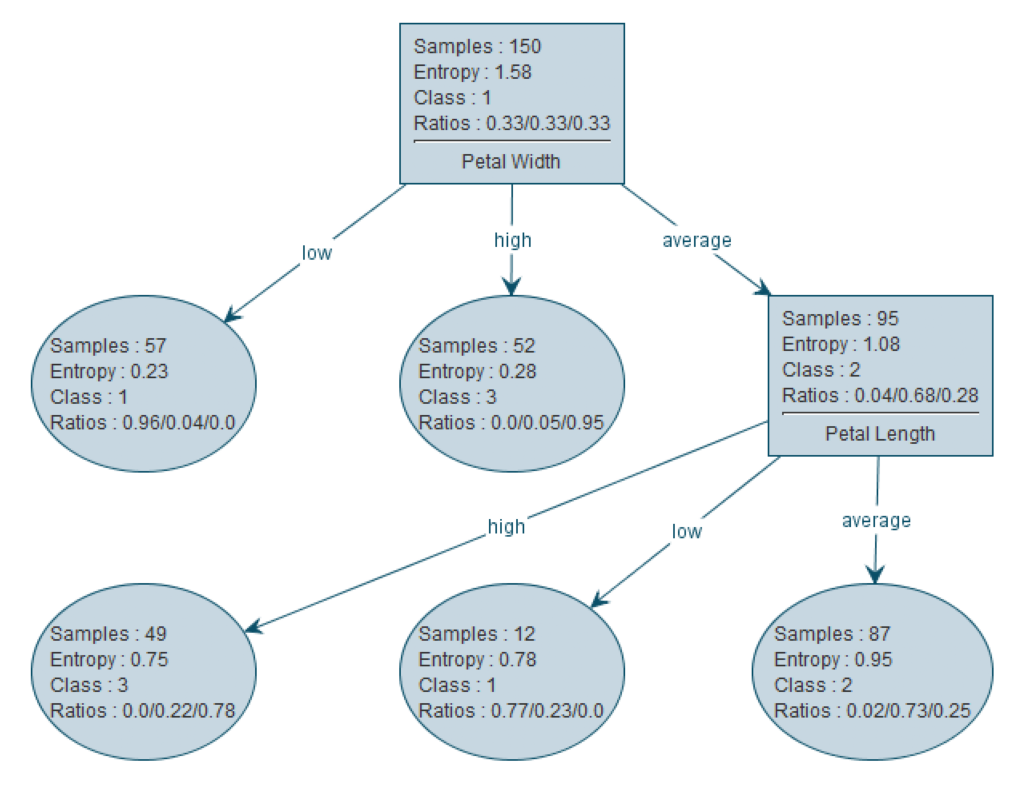

In [7]:
## this code is developed by Jose Maria Alonso-Moral

# plot static image (you need running Fispro for editing purposes)
plot_png_file("testlib/IRIS/training/IRIS.txt.kb.xml.RP.kb.xml.FDTP.kb.xml.fis.tree.png")

and you can see below how this system looks like after applying linguistic simplification with GUAJE.

In [8]:
## this code is developed by Jose Maria Alonso-Moral

fs_RP_FDTP_S_jfml_str_xml = "testlib/IRIS/training/IRIS.txt.kb.xml.RP.kb.xml.FDTP.kb.xml.S.kb.xml.jfml.xml"

#Sistema fuzzy
fs_RP_FDTP_S = Py4jfml.load(fs_RP_FDTP_S_jfml_str_xml)
vars = fs_RP_FDTP_S.getVariables()
for v in vars:
  v.setValue(float(iris_data.get(v.getName())[dins]))

fs_RP_FDTP_S.evaluate()
irisClass = fs_RP_FDTP_S.getVariable("Class")
iris_inf_value = irisClass.getValue()
print(" ")
print("instance: "+str(dins)+" (Actual output -> " + str(float(iris_data.get(iris_vnames[4])[dins]))+")")
print("INFRENCE RESULTS Fuzzy System")
print(" (INPUT): " + str(vars[0].getName()) + "=" + str(vars[0].getValue()) +", "+ str(vars[1].getName()) + "=" + str(vars[1].getValue()))
print(" (OUTPUT): " + str(irisClass.getName()) + "=" + str(iris_inf_value) + " ("+iris_class_names[round(iris_inf_value)-1]+")")
print(fs_RP_FDTP_S)

 
instance: 145 (Actual output -> 3.0)
INFRENCE RESULTS Fuzzy System
 (INPUT): Petal Length=5.2, Petal Width=2.3
 (OUTPUT): Class=3.0 (Virginica)

FUZZY SYSTEM: New Knowledge Base - MAMDANI
KNOWLEDGEBASE: 
  *Petal Length - domain[1.0, 6.9] - input
	more or less (average) -  trapezoid [a: 1.0, b: 1.0, c: 3.95, d: 6.9]
	high -  trapezoid [a: 3.95, b: 6.9, c: 6.9, d: 6.9]

  *Petal Width - domain[0.1, 2.5] - input
	low -  trapezoid [a: 0.1, b: 0.1, c: 0.1, d: 1.3]
	average -  triangular [a: 0.1, b: 1.3, c: 2.5]
	high -  trapezoid [a: 1.3, b: 2.5, c: 2.5, d: 2.5]

  *Class - domain[1.0, 3.0] - Accumulation:MAX; Defuzzifier:MOM - output
	1.0 -  singleton [a: 1.0]
	2.0 -  singleton [a: 2.0]
	3.0 -  singleton [a: 3.0]

RULEBASE:
  *mamdani - rulebase-New Knowledge Base: OR=MAX; AND=MIN; ACTIVATION=MIN
	RULE 1: rule1 - (0.0) IF Petal Width IS low THEN Class IS 1.0 [weight=1.0]
	RULE 2: rule2 - (0.1666667) IF Petal Length IS more or less (average) AND Petal Width IS average THEN Class IS 2.0 [

Let's see below how to generate the same system by coding it with py4JFML as a Takagi-Sugeno-Kang (TSK-type) fuzzy system. We see also the effect of changing fuzzy operators (OR=[MAX/SUM], AND/ACTIVATION=[MIN/PROD], defuzz=[WA: Weighted Average]). Pay attention how for the same data instance, the same rules are fired but with different firing degrees.

In [9]:
## this code is developed by Jose Maria Alonso-Moral

from py4jfml.FuzzyInferenceSystem import FuzzyInferenceSystem
from py4jfml.knowledgebase.KnowledgeBaseType import KnowledgeBaseType
from py4jfml.knowledgebasevariable.FuzzyVariableType import FuzzyVariableType
from py4jfml.knowledgebasevariable.TskVariableType import TskVariableType
from py4jfml.rule.AntecedentType import AntecedentType
from py4jfml.rule.ClauseType import ClauseType
from py4jfml.rule.TskConsequentType import TskConsequentType
from py4jfml.rule.TskFuzzyRuleType import TskFuzzyRuleType
from py4jfml.rulebase.TskRuleBaseType import TskRuleBaseType
from py4jfml.term.FuzzyTermType import FuzzyTermType
from py4jfml.term.TskTermType import TskTermType
from py4jfml.term.TskTerm import TskTerm
from py4jfml.rulebase.FuzzySystemRuleBase import FuzzySystemRuleBase

irisTSK = FuzzyInferenceSystem("iris - TSK")
kb = KnowledgeBaseType()
irisTSK.setKnowledgeBase(kb)
# we use the same inputs as in the fs_RP_FDTP_S Mamdani-type fuzzy system
vars = fs_RP_FDTP_S.getVariables()
pl_low= FuzzyTermType(name="low", type_java=FuzzyTermType.TYPE_trapezoidShape, param=[1.0,1.0,3.95,6.9])
pl_high= FuzzyTermType(name="high", type_java=FuzzyTermType.TYPE_trapezoidShape, param=[3.95,6.9,6.9,6.9])
PL = FuzzyVariableType(name="Petal Length", domainLeft=vars[0].getDomainleft(), domainRight=vars[0].getDomainright())
PL.addFuzzyTerm(ft=pl_low)
PL.addFuzzyTerm(ft=pl_high)
kb.addVariable(PL)

pw_low = FuzzyTermType(name="low", type_java=FuzzyTermType.TYPE_trapezoidShape, param=[0.1,0.1,0.1,1.3])
pw_avg= FuzzyTermType(name="average", type_java=FuzzyTermType.TYPE_triangularShape, param=[0.1,1.3,2.5])
pw_high= FuzzyTermType(name="high", type_java=FuzzyTermType.TYPE_trapezoidShape, param=[1.3,2.5,2.5,2.5])
PW = FuzzyVariableType(name="Petal Width", domainLeft=vars[1].getDomainleft(), domainRight=vars[1].getDomainright())
PW.addFuzzyTerm(ft=pw_low)
PW.addFuzzyTerm(ft=pw_avg)
PW.addFuzzyTerm(ft=pw_high)
kb.addVariable(PW)

outputClass= TskVariableType(name="Class")
outputClass.setDefaultValue(value=1.0)
outputClass.setCombination(value="WA") # WA: Weighted Average
outputClass.setType(value="IrisClass")
out_C1 = TskTermType(name="Setosa", order=TskTerm._ORDER_1, coeff=[1.0])
outputClass.addTskTerm(out_C1)
out_C2 = TskTermType(name="Versicolor", order=TskTerm._ORDER_1, coeff=[2.0])
outputClass.addTskTerm(out_C2)
out_C3 = TskTermType(name="Virginica", order=TskTerm._ORDER_1, coeff=[3.0])
outputClass.addTskTerm(out_C3)
kb.addVariable(outputClass)

#RULE BASE
rbTSK = TskRuleBaseType(name="RB1", tskRuleBaseType=FuzzySystemRuleBase.TYPE_TSK)
rbTSK.setActivationMethod(value="PROD")
rbTSK.setOrMethod(value="BSUM")
rbTSK.setAndMethod(value="PROD")

#RULE 1
rTSK1 = TskFuzzyRuleType(name="r1", connector="and", connectorMethod="PROD", weight=1.0)
antTSK1 = AntecedentType()
antTSK1.addClause(c=ClauseType(PW, pw_low))
conTSK1 = TskConsequentType()
conTSK1.addTskThenClause(variable=outputClass, term=out_C1)
rTSK1.setAntecedent(value=antTSK1)
rTSK1.setTskConsequent(value=conTSK1)
rbTSK.addTskRule(rule=rTSK1)

#RULE 2
rTSK2 = TskFuzzyRuleType(name="r2", connector="and", connectorMethod="PROD", weight=1.0)
antTSK2 = AntecedentType()
antTSK2.addClause(c=ClauseType(PL, pl_low))
antTSK2.addClause(c=ClauseType(PW, pw_avg))
conTSK2 = TskConsequentType()
conTSK2.addTskThenClause(variable=outputClass, term=out_C2)
rTSK2.setAntecedent(value=antTSK2)
rTSK2.setTskConsequent(value=conTSK2)
rbTSK.addTskRule(rule=rTSK2)

#RULE 3
rTSK3 = TskFuzzyRuleType(name="r3", connector="and", connectorMethod="PROD", weight=1.0)
antTSK3 = AntecedentType()
antTSK3.addClause(c=ClauseType(PL, pl_high))
antTSK3.addClause(c=ClauseType(PW, pw_avg))
conTSK3 = TskConsequentType()
conTSK3.addTskThenClause(variable=outputClass, term=out_C3)
rTSK3.setAntecedent(value=antTSK3)
rTSK3.setTskConsequent(value=conTSK3)
rbTSK.addTskRule(rule=rTSK3)

#RULE 4
rTSK4 = TskFuzzyRuleType(name="r4", connector="and", connectorMethod="PROD", weight=1.0)
antTSK4 = AntecedentType()
antTSK4.addClause(c=ClauseType(PW, pw_high))
conTSK4 = TskConsequentType()
conTSK4.addTskThenClause(variable=outputClass, term=out_C3)
rTSK4.setAntecedent(value=antTSK4)
rTSK4.setTskConsequent(value=conTSK4)
rbTSK.addTskRule(rule=rTSK4)

irisTSK.addRuleBase(rbTSK);

irisTSK_str_xml="testlib/IRIS/irisTSK.jfml.xml"
Py4jfml.writeFSTtoXML(irisTSK, irisTSK_str_xml)

varsTSK = irisTSK.getVariables()
for v in varsTSK:
  v.setValue(float(iris_data.get(v.getName())[dins]))

irisTSK.evaluate()
valueTSK = outputClass.getValue()
print(" ")
print("instance: "+str(dins)+" (Actual output -> " + str(float(iris_data.get(iris_vnames[4])[dins]))+")")
print("INFRENCE RESULTS Fuzzy System")
print(" (INPUT): " + str(varsTSK[0].getName()) + "=" + str(varsTSK[0].getValue()) +", "+ str(varsTSK[1].getName()) + "=" + str(varsTSK[1].getValue()))
print(" (OUTPUT): " + str(outputClass.getName()) + "=" + str(valueTSK)+ " ("+iris_class_names[round(valueTSK)-1]+")")
print(irisTSK)

 
instance: 145 (Actual output -> 3.0)
INFRENCE RESULTS Fuzzy System
 (INPUT): Petal Length=5.2, Petal Width=2.3
 (OUTPUT): Class=3.0 (Virginica)

FUZZY SYSTEM: iris - TSK
KNOWLEDGEBASE: 
  *Petal Length - domain[1.0, 6.9] - input
	low -  trapezoid [a: 1.0, b: 1.0, c: 3.95, d: 6.9]
	high -  trapezoid [a: 3.95, b: 6.9, c: 6.9, d: 6.9]

  *Petal Width - domain[0.1, 2.5] - input
	low -  trapezoid [a: 0.1, b: 0.1, c: 0.1, d: 1.3]
	average -  triangular [a: 0.1, b: 1.3, c: 2.5]
	high -  trapezoid [a: 1.3, b: 2.5, c: 2.5, d: 2.5]

  *Class - IrisClass
	Setosa - z = 1.0
	Versicolor - z = 2.0
	Virginica - z = 3.0

RULEBASE:
  *tsk - RB1: OR=BSUM; AND=PROD; ACTIVATION=PROD
	RULE 1: r1 - (0.0) IF Petal Width IS low THEN Class IS Setosa [weight=1.0]
	RULE 2: r2 - (0.09604523) IF Petal Length IS low AND Petal Width IS average THEN Class IS Versicolor [weight=1.0]
	RULE 3: r3 - (0.07062147) IF Petal Length IS high AND Petal Width IS average THEN Class IS Virginica [weight=1.0]
	RULE 4: r4 - (0.8333

### **Exercise I1.1**

Compare the behavior of previous fuzzy systems (fs_RP_FDTP_S, irisTSK) when making fuzzy inferences with the following data instances: 
* 15 (iris-setosa)
* 75 (iris-versicolor)
* 125 (iris-virginica)

Run the code below and answer to the following questions:
* Which is the inferred output class by each fuzzy system?
> Both `fs_RP_FDTP_S` and `irisTSK` return the same inferred output classes **Setosa**, **Versicolor** and **Virginica**

* Which are the fired rules?
> The fired rules for each case are:
> * Instance **15** (iris-setosa): rules 1 and 2
> * Instance **75** (iris-versicolor): rules 2, 3 and 4
> * Instance **125** (iris-virginica): rules 2, 3 and 4

Pay attention to the firing degrees:
* Do you observe the same firing degrees with Mamdani and TSK fuzzy systems? (if not, explain why)
> The same rules are fired for both systems, but we don't observe the same firing degrees with **Mamdani** and **TSK** fuzzy systems. This is because they use different methods to handle rule activation and output computation. In the Mamdani system, the firing degree is determined by the match between inputs and the rule's antecedent fuzzy sets, and the output is a fuzzy set that requires defuzzification. In the TSK system, the firing degree is also based on the input's match to the antecedent, but the consequent is a crisp function (e.g., a linear equation). Additionally, TSK systems often normalize the firing degrees to compute a weighted average of the rule outputs, which can further alter the effective firing strength compared to Mamdani systems. These differences in structure and computation lead to different firing degrees and outputs in the two systems.

In [10]:
## this code is developed by Jose Maria Alonso-Moral
dd = [15, 75, 125] # repeat for 15, 75 and 125

for dins in dd:
  # Mamdani FRBS
  vars = fs_RP_FDTP_S.getVariables() 
  for v in vars:
    v.setValue(float(iris_data.get(v.getName())[dins]))

  fs_RP_FDTP_S.evaluate()
  irisClass = fs_RP_FDTP_S.getVariable("Class")
  iris_inf_value = irisClass.getValue()
  print(" ")
  print("instance: "+str(dins)+" (Actual output -> " + str(float(iris_data.get(iris_vnames[4])[dins]))+")")
  print("INFRENCE RESULTS Fuzzy System")
  print(" (INPUT): " + str(vars[0].getName()) + "=" + str(vars[0].getValue()) +", "+ str(vars[1].getName()) + "=" + str(vars[1].getValue()))
  print(" (OUTPUT): " + str(irisClass.getName()) + "=" + str(iris_inf_value) + " ("+iris_class_names[round(iris_inf_value)-1]+")")
  print(fs_RP_FDTP_S)

  # TSK FRBS
  varsTSK = irisTSK.getVariables()
  for v in varsTSK:
    v.setValue(float(iris_data.get(v.getName())[dins]))

  irisTSK.evaluate()
  valueTSK = outputClass.getValue()
  print(" ")
  print("instance: "+str(dins)+" (Actual output -> " + str(float(iris_data.get(iris_vnames[4])[dins]))+")")
  print("INFRENCE RESULTS Fuzzy System")
  print(" (INPUT): " + str(varsTSK[0].getName()) + "=" + str(varsTSK[0].getValue()) +", "+ str(varsTSK[1].getName()) + "=" + str(varsTSK[1].getValue()))
  print(" (OUTPUT): " + str(outputClass.getName()) + "=" + str(valueTSK)+ " ("+iris_class_names[round(valueTSK)-1]+")")
  print(irisTSK)

 
instance: 15 (Actual output -> 1.0)
INFRENCE RESULTS Fuzzy System
 (INPUT): Petal Length=1.5, Petal Width=0.4
 (OUTPUT): Class=1.0 (Setosa)

FUZZY SYSTEM: New Knowledge Base - MAMDANI
KNOWLEDGEBASE: 
  *Petal Length - domain[1.0, 6.9] - input
	more or less (average) -  trapezoid [a: 1.0, b: 1.0, c: 3.95, d: 6.9]
	high -  trapezoid [a: 3.95, b: 6.9, c: 6.9, d: 6.9]

  *Petal Width - domain[0.1, 2.5] - input
	low -  trapezoid [a: 0.1, b: 0.1, c: 0.1, d: 1.3]
	average -  triangular [a: 0.1, b: 1.3, c: 2.5]
	high -  trapezoid [a: 1.3, b: 2.5, c: 2.5, d: 2.5]

  *Class - domain[1.0, 3.0] - Accumulation:MAX; Defuzzifier:MOM - output
	1.0 -  singleton [a: 1.0]
	2.0 -  singleton [a: 2.0]
	3.0 -  singleton [a: 3.0]

RULEBASE:
  *mamdani - rulebase-New Knowledge Base: OR=MAX; AND=MIN; ACTIVATION=MIN
	RULE 1: rule1 - (0.75) IF Petal Width IS low THEN Class IS 1.0 [weight=1.0]
	RULE 2: rule2 - (0.25000003) IF Petal Length IS more or less (average) AND Petal Width IS average THEN Class IS 2.0 [we

## 3.2 Visual Analysis 

In this section, we first define functions for ploting fuzzy variables, fuzzy terms and data histograms. Later, we compare uniform fuzzy partitions with fuzzy partitions extracted from data, in agreement with the data distribution.

In [11]:
## this code is developed by Jose Maria Alonso-Moral

# Plot Fuzzy Partitions
def plot_fuzzy_variable(fvt):
  print(fvt)
  plt.title(fvt.getName())
  plt.ylabel('membership degree')
  plt.xlabel('input range')
  plt.axis([fvt.getDomainleft(), fvt.getDomainright(), 0, 1])
  labels = fvt.getTerms()
  c = 0
  warn = False
  for i in labels:
      pp = i.getParam()
      if (len(pp)==1):
        plt.bar(pp[0], 1, width=0.2)
        warn = True
      else:
        if (c==0):
          plt.plot([pp[0], pp[0], pp[len(pp) - 2], pp[len(pp) - 1]], [1, 1, 1, 0], label=i.getName())
        elif (c==len(labels)-1):
          plt.plot([pp[0], pp[1], pp[len(pp) - 1], pp[len(pp) - 1]], [0, 1, 1, 1], label=i.getName())
        else:
          if (len(pp)==3):
            plt.plot([pp[0], pp[1], pp[2]], [0, 1, 0], label=i.getName())
          elif (len(pp)==4):
            plt.plot([pp[0], pp[1], pp[2], pp[3]], [0, 1, 1, 0], label=i.getName())
      c = c+1
  
  if (warn != True):
    plt.grid(True)
  else:
    xvalues= range(1,len(labels)+1)
    plt.xticks(xvalues)
       
  plt.legend(labels)
  plt.show()

# Plot Fuzzy Terms (labels in a fuzzy partition)
def plot_term(v,t,i):
  #print(t.toString())
  m = t.getMembershipFunction()
  if (m.getName()=="SingletonMembershipFunction"):
    plt.title(v.getName()+" is "+t.getName()+" ("+str(i)+")")
  else:
    mv=t.getMembershipValue(i)
    plt.title(v.getName()+" is "+t.getName()+" ("+str(mv)+")")

  plt.ylabel('membership degree')
  plt.xlabel('input range')
  plt.axis([v.getDomainleft(), v.getDomainright(), 0, 1])
  pp = t.getParam()
  #print(m.getName())
  warn = False
  if (m.getName()=="SingletonMembershipFunction"):
    #print("singleton")
    plt.bar(pp[0], i, width=0.2)
    warn = True
  else:
    if (m.getName()=="TriangularMembershipFunction"):
      #print("triangle")
      plt.plot([pp[0], pp[1], pp[2]], [0, 1, 0])
    else:
      #print("trapezoid")
      plt.plot([pp[0], pp[1], pp[2], pp[3]], [0, 1, 1, 0])

    plt.axvline(x=i, ymin=0, ymax=mv, ls='--', color='r')

  if (warn):
    xvalues= range(1,len(v.getTerms())+1)
    plt.xticks(xvalues)

  plt.show()

# Plot Histogram
def plot_histogram(fvt,d,b):
  n_bins = b
  plt.title(fvt.getName())
  plt.ylabel('number of data instances')
  plt.xlabel('input range')
  lim = len(d)
  if (lim > 100):
    lim = len(d)/3

  plt.axis([fvt.getDomainleft(), fvt.getDomainright(),0,lim])
  plt.hist(d, bins=n_bins, align='mid', rwidth=0.9)

  if (b < 10):
    xvalues= range(1,len(fvt.getTerms())+1)
    plt.xticks(xvalues)

  plt.show()

### **Comparing regular (RP) and induced partitions (SP)**

For each feature in the IRIS dataset, we plot first an histogram with the data distribution, then a uniform fuzzy partition (RP) and a fuzzy partition generated by GUAJE in agreement with data distribution.

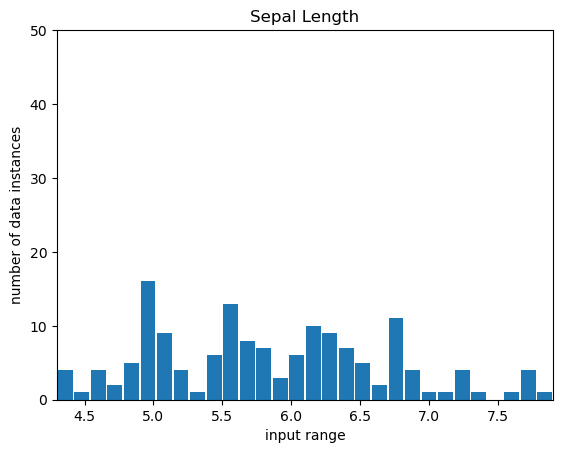

Regular Partition
Sepal Length - domain[4.3, 7.9] - input
	low -  trapezoid [a: 4.3, b: 4.3, c: 4.3, d: 6.1]
	average -  triangular [a: 4.3, b: 6.1, c: 7.9]
	high -  trapezoid [a: 6.1, b: 7.9, c: 7.9, d: 7.9]



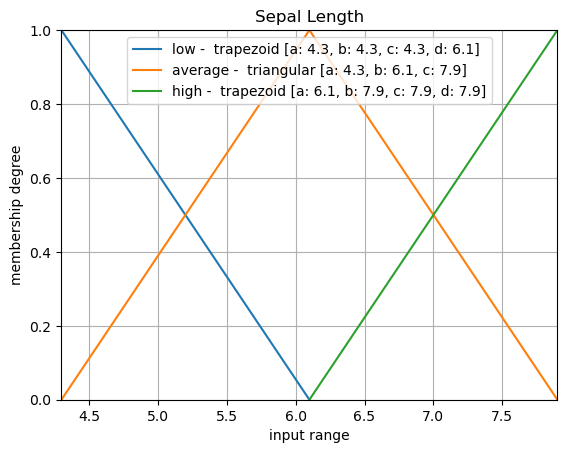

Induced Partition
Sepal Length - domain[4.3, 7.9] - input
	low -  trapezoid [a: 4.3, b: 4.3, c: 5.019, d: 6.048]
	average -  triangular [a: 5.019, b: 6.048, c: 7.05]
	high -  trapezoid [a: 6.048, b: 7.05, c: 7.9, d: 7.9]



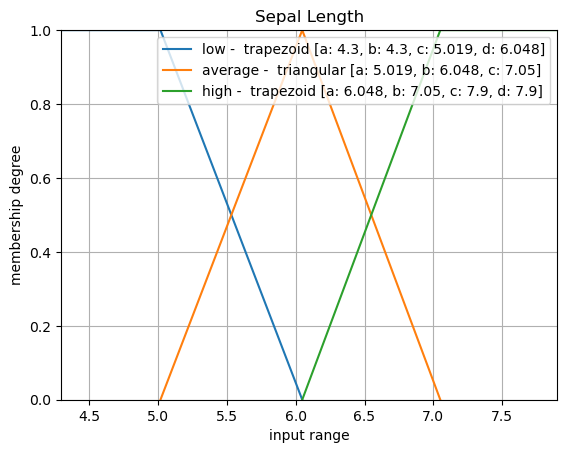

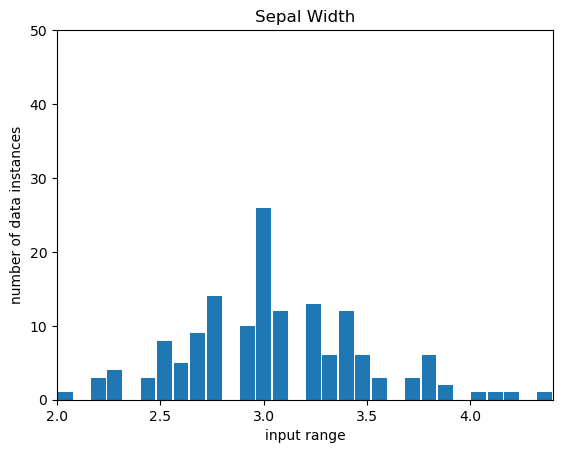

Regular Partition
Sepal Width - domain[2.0, 4.4] - input
	low -  trapezoid [a: 2.0, b: 2.0, c: 2.0, d: 3.2]
	average -  triangular [a: 2.0, b: 3.2, c: 4.4]
	high -  trapezoid [a: 3.2, b: 4.4, c: 4.4, d: 4.4]



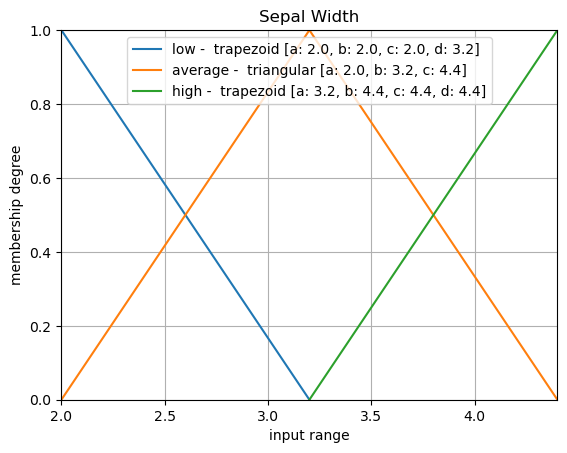

Induced Partition
Sepal Width - domain[2.0, 4.4] - input
	low -  trapezoid [a: 2.0, b: 2.0, c: 2.585, d: 3.119]
	average -  triangular [a: 2.585, b: 3.119, c: 3.758]
	high -  trapezoid [a: 3.119, b: 3.758, c: 4.4, d: 4.4]



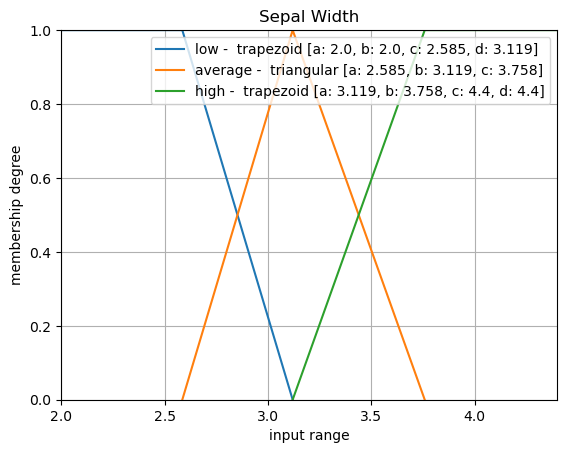

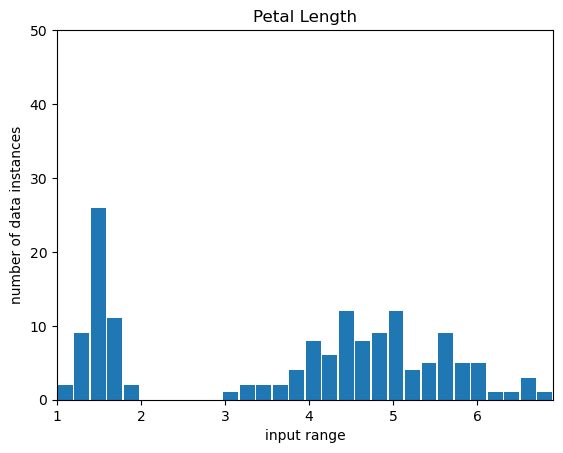

Regular Partition
Petal Length - domain[1.0, 6.9] - input
	low -  trapezoid [a: 1.0, b: 1.0, c: 1.0, d: 3.95]
	average -  triangular [a: 1.0, b: 3.95, c: 6.9]
	high -  trapezoid [a: 3.95, b: 6.9, c: 6.9, d: 6.9]



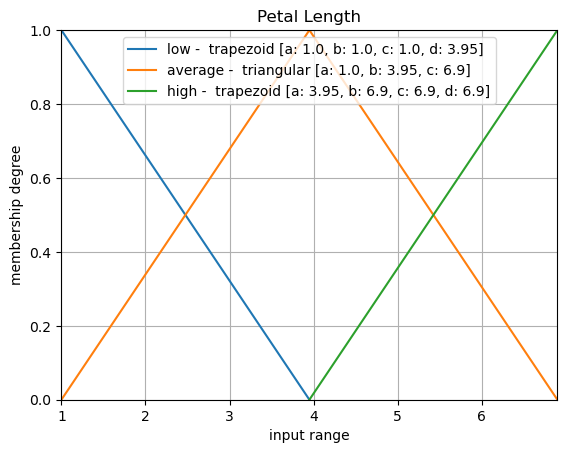

Induced Partition
Petal Length - domain[1.0, 6.9] - input
	low -  trapezoid [a: 1.0, b: 1.0, c: 1.464, d: 4.432]
	average -  triangular [a: 1.464, b: 4.432, c: 5.826]
	high -  trapezoid [a: 4.432, b: 5.826, c: 6.9, d: 6.9]



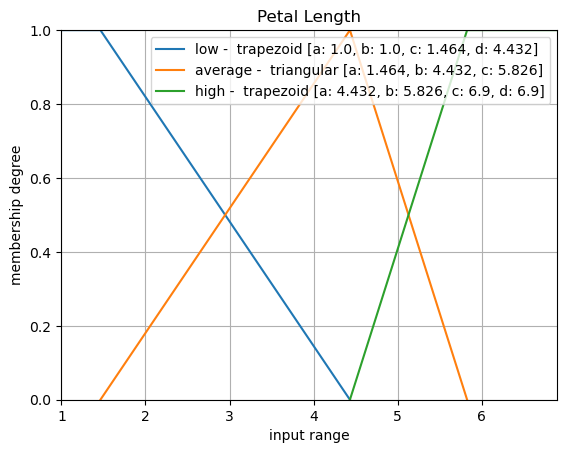

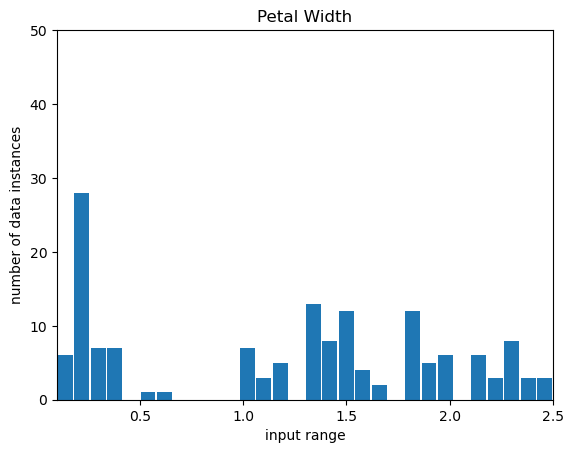

Regular Partition
Petal Width - domain[0.1, 2.5] - input
	low -  trapezoid [a: 0.1, b: 0.1, c: 0.1, d: 1.3]
	average -  triangular [a: 0.1, b: 1.3, c: 2.5]
	high -  trapezoid [a: 1.3, b: 2.5, c: 2.5, d: 2.5]



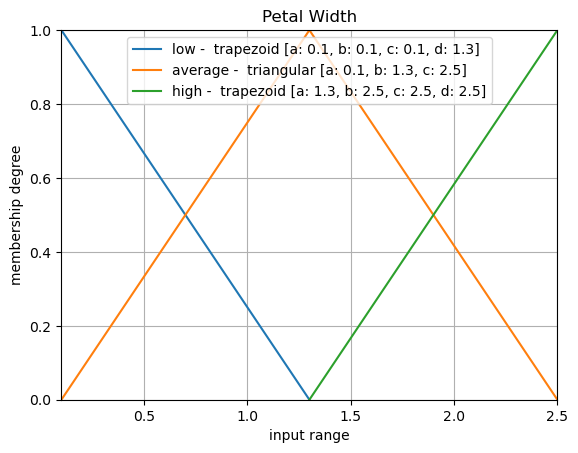

Induced Partition
Petal Width - domain[0.1, 2.5] - input
	low -  trapezoid [a: 0.1, b: 0.1, c: 0.244, d: 1.337]
	average -  triangular [a: 0.244, b: 1.337, c: 2.074]
	high -  trapezoid [a: 1.337, b: 2.074, c: 2.5, d: 2.5]



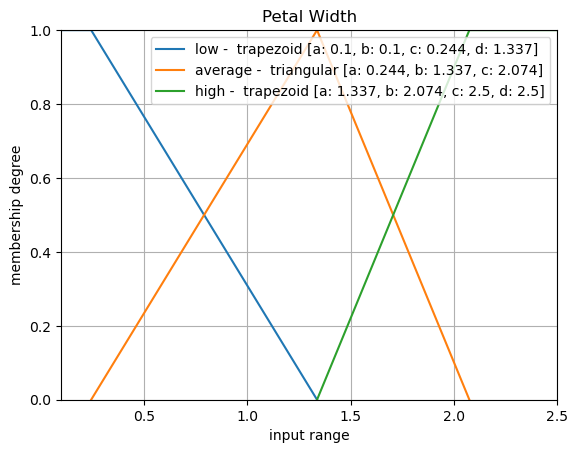

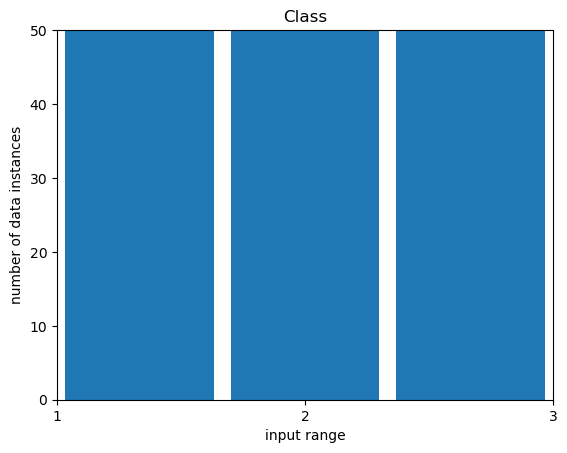

Output Class
Class - domain[1.0, 3.0] - Accumulation:MAX; Defuzzifier:MOM - output
	1.0 -  singleton [a: 1.0]
	2.0 -  singleton [a: 2.0]
	3.0 -  singleton [a: 3.0]



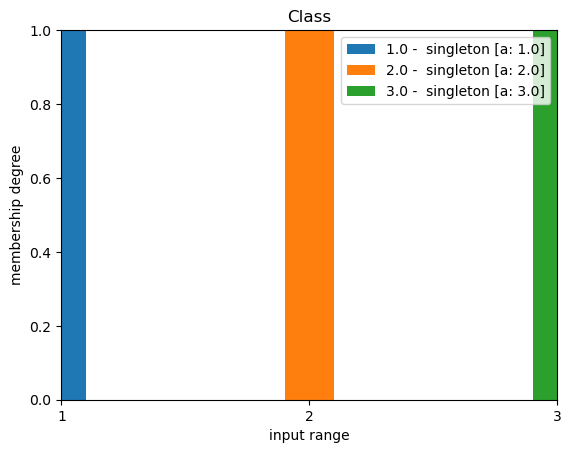

In [12]:
## this code is developed by Jose Maria Alonso-Moral

# Regular versus induced partitions
jfml_str_xml_ind = "testlib/IRIS/training/IRIS.txt.kb.xml.SP.kb.xml.FDTP.kb.xml.jfml.xml";

#Sistema fuzzy
fs_SP_FDTP = Py4jfml.load(jfml_str_xml_ind)
#print(fs_SP_FDTP)
vars = fs_SP_FDTP.getVariables()
for v in vars:
  v.setValue(float(iris_data.get(v.getName())[dins]))

fuzzyVarSL_ind = vars[0]
fuzzyVarSW_ind = vars[1]
fuzzyVarPL_ind = vars[2]
fuzzyVarPW_ind = vars[3]

# Visualizing Regular Partitions vs Induced Partitions
plot_histogram(fuzzyVarSL,iris_data.get(fuzzyVarSL.getName()),30)
print("Regular Partition")
print("=================")
plot_fuzzy_variable(fuzzyVarSL)
print("Induced Partition")
print("=================")
plot_fuzzy_variable(fuzzyVarSL_ind)

plot_histogram(fuzzyVarSW,iris_data.get(fuzzyVarSW.getName()),30)
print("Regular Partition")
print("=================")
plot_fuzzy_variable(fuzzyVarSW)
print("Induced Partition")
print("=================")
plot_fuzzy_variable(fuzzyVarSW_ind)

plot_histogram(fuzzyVarPL,iris_data.get(fuzzyVarPL.getName()),30)
print("Regular Partition")
print("=================")
plot_fuzzy_variable(fuzzyVarPL)
print("Induced Partition")
print("=================")
plot_fuzzy_variable(fuzzyVarPL_ind)

plot_histogram(fuzzyVarPW,iris_data.get(fuzzyVarPW.getName()),30)
print("Regular Partition")
print("=================")
plot_fuzzy_variable(fuzzyVarPW)
print("Induced Partition")
print("=================")
plot_fuzzy_variable(fuzzyVarPW_ind)

# Examples of crisp variable
print(" ")
plot_histogram(irisClass,iris_data.get(irisClass.getName()),iris_numClasses)
print("Output Class")
plot_fuzzy_variable(irisClass)

### **Handling Fuzzy Rules with JFML**

In this section, we first define a function for showing graphically the fuzzy inference process in a Mamdani-type fuzzy system. Then, we compare how the process changes when considering RP or SP fuzzy partitions. Given the same input, rule firing degrees are slightly different.

In [13]:
## this code is developed by Jose Maria Alonso-Moral

# Plot Fuzzy Rules
def plot_fuzzy_rules(fr,opt):
  print("RULEBASE:")
  RBS = fr.getAllRuleBase()
  if (opt):
    print(RBS[0].getActivatedRules())
  else:
    print(RBS[0].toString())

  rules = RBS[0].getRules()
  #print(len(rules))
  for r in rules:
    #print(r.getEvaluation())
    if ( (opt==False) or (r.getEvaluation() > 0) ):
      print("Graphical view of " + r.toString())
      ccant = r.getAntecedent().getClauses()
      plt.figure(figsize=[15,5])
      k=1
      for a in ccant:
        va= a.getVariable()
        v= va.getValue()
        t= a.getTerm()
        plt.subplot(1,len(ccant)+1,k)
        plot_term(va,t,v)
        k=k+1

      cons = r.getConsequent().getThen().getClause()[0]
      #print(cons.toString())
      cout= cons.getVariable()
      cv= cout.getValue()
      ct= cons.getTerm()
      plt.subplot(1,len(ccant)+1,k)
      plot_term(cout,ct,r.getEvaluation())
      #print(cout.toString())
      #print(ct.toString())
      plt.show()

### **Exercise I1.2**

The aim of this exercise is understanding the effect of regular (RP) versus induced (IP) partitions when making a fuzzy inference. Run the code below (data instance 67) and answer the following questions:

* Which is the inferred output class by each fuzzy system?
> Both systems infer the same output, in this case, **Versicolor**.
* Which are the fired rules? 
> When evaluating the system with regular partitions, the fired rules are 1, 3 and 4. When using induced partitions, the fired rules are 1, 2 and 3.

Pay attention to the firing degrees:
* Are they the same with regular or induced partitions? (if not, explain why)
> This occurs due to the distinct partition methods employed by each system. Regular partitions use predefined, evenly spaced regions in the input space, resulting in consistent membership functions and predictable firing degrees. In contrast, induced partitions adapt to the data distribution, creating non-uniform membership functions that reflect the local density and complexity of the data. This adaptability leads to variations in how inputs match the rule antecedents, causing differences in rule firing strengths compared to regular partitions.
* Can you write an explanation of the output given by each system (in terms of the fired rules)?
> In both cases, rule3  gets fired with a very strong firing degree, indicating that the model is strongly classifying the input as class 2, since both petal length and petal width are average.



Fuzzy System with Regular Partitions
 
instance: 67 (Actual output -> 2.0)
INFRENCE RESULTS Fuzzy System with Induced Partitions
 (INPUT): Sepal Length=7.2, Sepal Width=3.2, Petal Length=6.0, Petal Width=1.8
 (OUTPUT): Class=2.0 (Versicolor)
 
RULEBASE:
  RULE 1: rule1 - (0.24999997) IF Petal Width IS low THEN Class IS 1.0 [weight=1.0]
  RULE 2: rule3 - (0.75) IF Petal Length IS average AND Petal Width IS average THEN Class IS 2.0 [weight=1.0]
  RULE 3: rule4 - (0.050847407) IF Petal Length IS high AND Petal Width IS average THEN Class IS 3.0 [weight=1.0]

Graphical view of rule1 - (0.24999997) IF Petal Width IS low THEN Class IS 1.0 [weight=1.0]


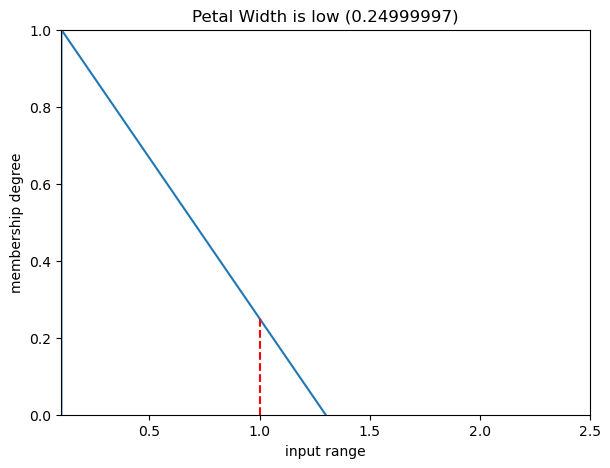

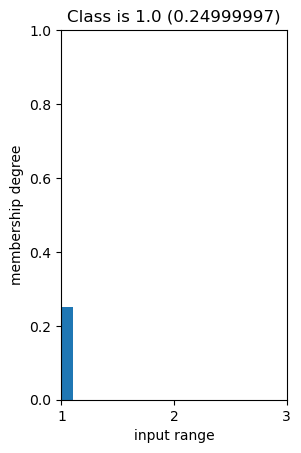

Graphical view of rule3 - (0.75) IF Petal Length IS average AND Petal Width IS average THEN Class IS 2.0 [weight=1.0]


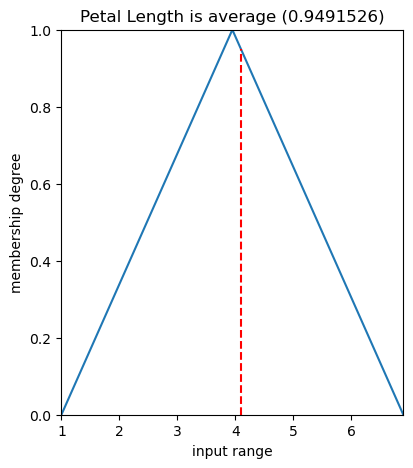

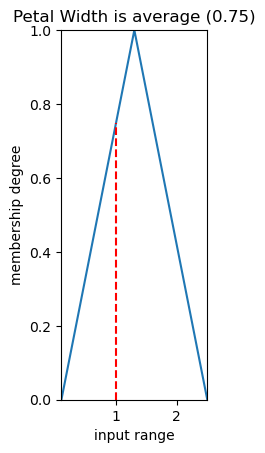

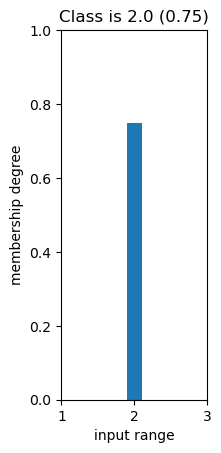

Graphical view of rule4 - (0.050847407) IF Petal Length IS high AND Petal Width IS average THEN Class IS 3.0 [weight=1.0]


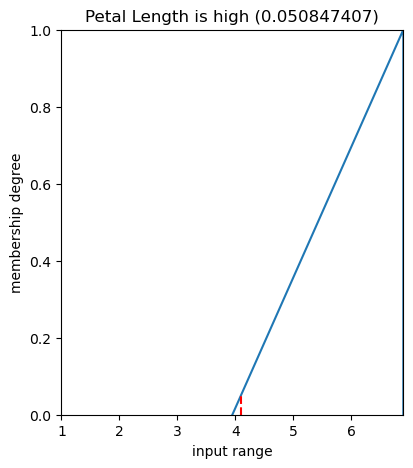

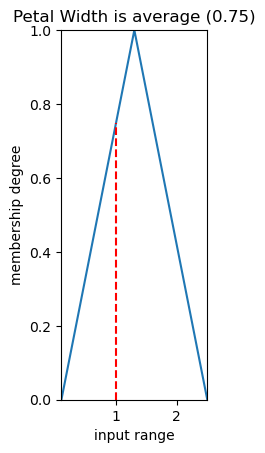

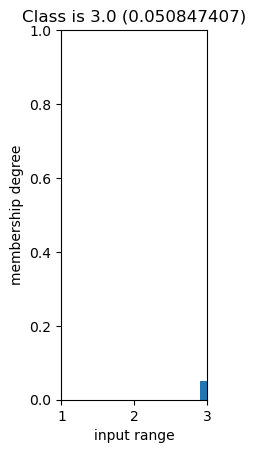

Fuzzy System with Induced Partitions
 
instance: 67 (Actual output -> 2.0)
INFRENCE RESULTS Fuzzy System with Induced Partitions
 (INPUT): Sepal Length=5.8, Sepal Width=2.7, Petal Length=4.1, Petal Width=1.0
 (OUTPUT): Class=2.0 (Versicolor)
 
RULEBASE:
  RULE 1: rule1 - (0.11185992) IF Petal Length IS low THEN Class IS 1.0 [weight=1.0]
  RULE 2: rule2 - (0.3083257) IF Petal Length IS average AND Petal Width IS low THEN Class IS 2.0 [weight=1.0]
  RULE 3: rule3 - (0.69167423) IF Petal Length IS average AND Petal Width IS average THEN Class IS 2.0 [weight=1.0]

Graphical view of rule1 - (0.11185992) IF Petal Length IS low THEN Class IS 1.0 [weight=1.0]


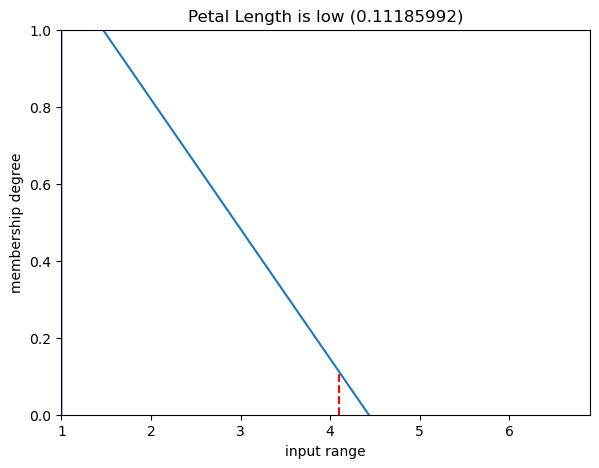

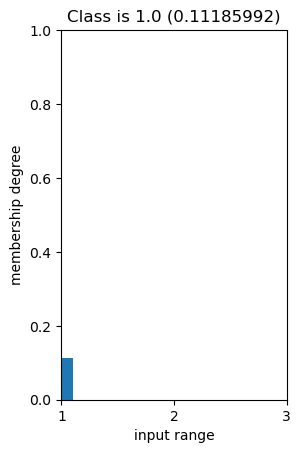

Graphical view of rule2 - (0.3083257) IF Petal Length IS average AND Petal Width IS low THEN Class IS 2.0 [weight=1.0]


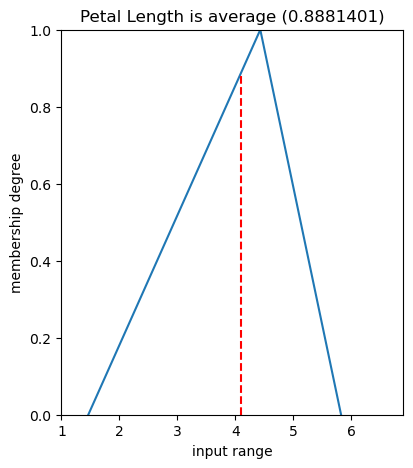

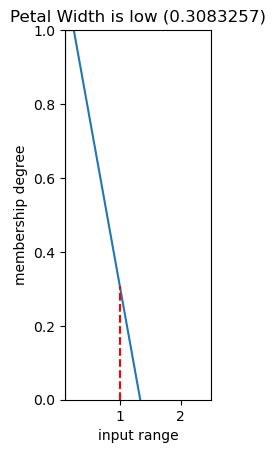

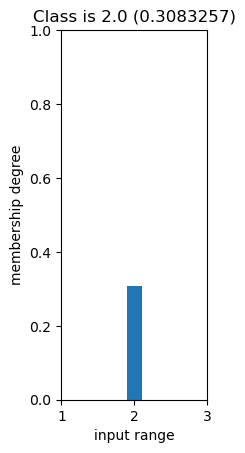

Graphical view of rule3 - (0.69167423) IF Petal Length IS average AND Petal Width IS average THEN Class IS 2.0 [weight=1.0]


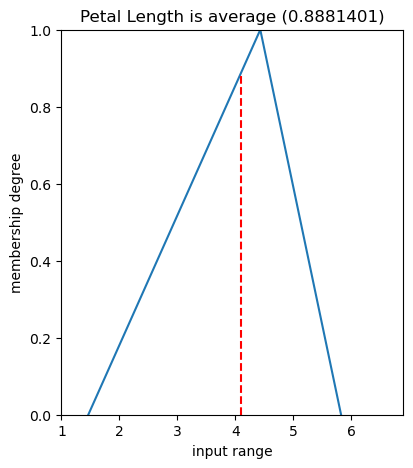

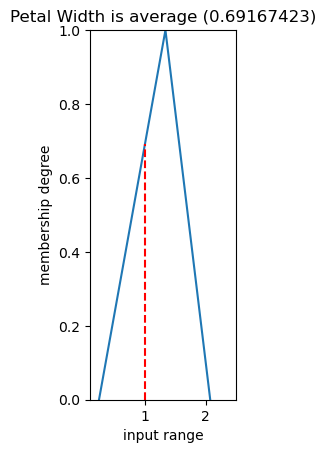

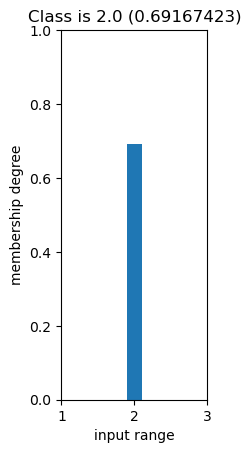

In [14]:
## this code is developed by Jose Maria Alonso-Moral
#comparison with fuzzy inference by the fuzzy system with Induced Partitions
dins = 67

print("Fuzzy System with Regular Partitions")
vars = fs_RP_FDTP.getVariables() 
for v in vars:
    v.setValue(float(iris_data.get(v.getName())[dins]))

fs_RP_FDTP.evaluate()
#get output
irisClass_ind = fs_RP_FDTP.getVariable("Class")
iris_value_inf = irisClass_ind.getValue()
#print results
print(" ")
print("instance: "+str(dins)+" (Actual output -> " + str(float(iris_data.get(iris_vnames[4])[dins]))+")")
print("INFRENCE RESULTS Fuzzy System with Induced Partitions")
print(" (INPUT): " + str(fuzzyVarSL_ind.getName()) + "=" + str(fuzzyVarSL_ind.getValue()) +", "+ str(fuzzyVarSW_ind.getName()) + "=" + str(fuzzyVarSW_ind.getValue()) +", "+ str(fuzzyVarPL_ind.getName()) + "=" + str(fuzzyVarPL_ind.getValue()) +", "+ str(fuzzyVarPW_ind.getName()) + "=" + str(fuzzyVarPW_ind.getValue()))
print(" (OUTPUT): " + str(irisClass_ind.getName()) + "=" + str(iris_value_inf) + " ("+iris_class_names[round(iris_value_inf)-1]+")")
print(" ")
plot_fuzzy_rules(fs_RP_FDTP,True)

print("Fuzzy System with Induced Partitions")
vars = fs_SP_FDTP.getVariables() 
for v in vars:
    v.setValue(float(iris_data.get(v.getName())[dins]))

fs_SP_FDTP.evaluate()
#get output
irisClass_ind = fs_SP_FDTP.getVariable("Class")
iris_value_inf = irisClass_ind.getValue()
#print results
print(" ")
print("instance: "+str(dins)+" (Actual output -> " + str(float(iris_data.get(iris_vnames[4])[dins]))+")")
print("INFRENCE RESULTS Fuzzy System with Induced Partitions")
print(" (INPUT): " + str(fuzzyVarSL_ind.getName()) + "=" + str(fuzzyVarSL_ind.getValue()) +", "+ str(fuzzyVarSW_ind.getName()) + "=" + str(fuzzyVarSW_ind.getValue()) +", "+ str(fuzzyVarPL_ind.getName()) + "=" + str(fuzzyVarPL_ind.getValue()) +", "+ str(fuzzyVarPW_ind.getName()) + "=" + str(fuzzyVarPW_ind.getValue()))
print(" (OUTPUT): " + str(irisClass_ind.getName()) + "=" + str(iris_value_inf) + " ("+iris_class_names[round(iris_value_inf)-1]+")")
print(" ")
plot_fuzzy_rules(fs_SP_FDTP,True)

### **Assessing Performance**

In this section, we first define some functions to visualize confusion matrixes (Accuracy) and Pareto fronts (Interpretability-Accuracy Trade-off). Then, we run cross-validation with the aim of comparing several models in terms of both accuracy and interpretability. Accuracy is measured in terms of the classification ratio. Interpretability is measured in terms of nubmer of rules. 

In [23]:
## this code is developed by Jose Maria Alonso-Moral

# Plot Confusion Matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else '.2f'
    thresh = cm.max() / 2.
    acc = []
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        if (i==j):
          acc += [cm[i, j]]

    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.tight_layout()
    mm = round(np.mean(acc),2)
    print("Classification Ratio ("+title+"): Mean="+str(mm)+"; Stdev="+str(round(np.std(acc),2)))
    return mm;

def plot_pareto_front(x,y,n,maxx):
  plt.title("Pareto Front")
  plt.ylabel('Accuracy (Classification Ratio)')
  plt.xlabel('Interpretability (Num of rules/leaves)')
  plt.axis([0, maxx, 0, 1])
  #plt.plot(x, y, 'ro')
  c=["ro","bo","go","rs","bs","gs","r*","b*","g*","r+","b+","g+"]
  for m in n:
    m_idx= n.index(m)
    plt.plot(x[m_idx], y[m_idx], c[m_idx], label=m)

    #plt.annotate(m, xy=(x[m_idx], y[m_idx]), xytext=(x[m_idx]+0.1, y[m_idx]-0.1), arrowprops=dict(facecolor='black', shrink=0.05), )
  plt.grid(True)
  plt.legend()
  plt.show()

def cross_val_analysis(n_folds, dfName, ml_model_names, ml_models, fis_model_names, fis_filenames, featNames, target, nClasses):
  folds = []
  for fold_idx in range(n_folds):
    fold_dict = {}

    # load data
    fold_path = "testlib/"+str(dfName)+"/"+str(n_folds)+"CV/CV" + str(fold_idx)
    trainingset_filename = dfName + ".txt.aux.train." + str(fold_idx)
    testset_filename = dfName + ".txt.aux.test." + str(fold_idx)

    trainingset = pd.read_csv(fold_path+"/"+trainingset_filename, header=None, names=featNames+target, dtype={target[0]: str})
    fold_dict["trainingset"] = trainingset
    testset = pd.read_csv(fold_path+"/"+testset_filename, header=None, names=featNames+target, dtype={target[0]: str})
    fold_dict["testset"] = testset

    # load Fuzzy Systems
    fis_models = []
    for fn in fis_filenames:
      fis_filename = fn
      fis = Py4jfml.load(fold_path+"/"+fn)
      fis_models += [fis]

    fold_dict["fis_models"] = fis_models

    # test FIS
    fis_actual_array = []
    fis_nr_array = []
    for fis in fis_models:
      actuals = []
      for i in range(len(testset)):
        for f in featNames:
             fvar = fis.getVariable(f)
             if fvar is not None:
               vv= testset[f][i]
               if (vv > fvar.getDomainright()):
                  vv= fvar.getDomainright()
               elif (vv < fvar.getDomainleft()):
                  vv= fvar.getDomainleft()

               fvar.setValue(vv)

        fis.evaluate()
        actuals.append(str(fis.getVariable(target[0]).getValue()))

      fis_actual_array += [actuals]
      fis_nr_array += [len(fis.getAllRuleBase()[0].getRules())]

    fold_dict["fis_results"] = fis_actual_array
    fold_dict["fis_nr_results"] = fis_nr_array

    # train ml models
    ml_array = []
    dt_nr_array = []
    for model in ml_models:
        ml_array += [model.fit(trainingset[featNames].values,
                               trainingset[target].values.ravel())]

    
    fold_dict["ml_array"] = ml_array
    dt_nr_array += [ml_models[ml_model_names.index("Decision Tree")].get_n_leaves()]
    fold_dict["dt_nr_results"] = dt_nr_array

    # test ml models
    ml_actual = []
    for model in ml_array:
        ml_actual += [model.predict(testset[featNames].values)]
    fold_dict["ml_results"] = ml_actual

    folds += [fold_dict]

  # compute classification errors for each fold
  results = []
  for fold_idx in range(n_folds):
    result = {}

    fold = folds[fold_idx]
    desired = fold["testset"][target].values.ravel()
    result["desired"] = desired

    # process FIS
    nr_fis = []
    for fis_idx in range(len(fis_model_names)):
      #print(fold["fis_nr_results"][fis_idx])
      nr_fis.append(fold["fis_nr_results"][fis_idx])

    #print(nr_fis)
    result["nr_fis"] = nr_fis

    cm_fis = []
    for fis_idx in range(len(fold["fis_results"])):
        actual = fold["fis_results"][fis_idx]
        cm = confusion_matrix(desired, actual, labels=[str(i+1)+".0" for i in range(nClasses)])
        cm_fis.append(cm)

    result["cm_fis"] = cm_fis

    # process ML models
    nr_ml = []
    ml_idx= ml_model_names.index("Decision Tree")
    nr_ml.append(fold["dt_nr_results"][ml_idx])
    result["nr_ml"] = nr_ml

    cm_ml = []
    for ml_idx in range(len(fold["ml_results"])):
        actual = fold["ml_results"][ml_idx]
        cm = confusion_matrix(desired, actual, labels=[str(i+1)+".0" for i in range(nClasses)])
        cm_ml.append(cm)

    result["cm_ml"] = cm_ml

    results.append(result)

  # Compute Confusion Matrixes
  fis_grand = []
  fis_accuracy = []
  fis_interp = []
  for fis_idx in range(len(fis_model_names)):
    sm= round(np.mean([results[i]["nr_fis"][fis_idx] for i in range(len(results))]),2)
    ss= round(np.std([results[i]["nr_fis"][fis_idx] for i in range(len(results))]),2)
    print("Number of rules ("+fis_model_names[fis_idx]+"): Mean="+str(sm) + "; Stdev="+str(ss))
    fis_grand.append(
         sum([results[i]["cm_fis"][fis_idx] for i in range(len(results))]) /
         sum([len(results[i]["desired"]) for i in range(len(results))]))

    fis_accuracy.append(sum([fis_grand[fis_idx][i, i] for i in range(nClasses)]))
    fis_interp.append(sm)

  ml_grand = []
  ml_accuracy = []

  for ml_idx in range(len(ml_models)):
    nn=sum([results[i]["cm_ml"][ml_idx] for i in range(len(results))])
    dd=sum([len(results[i]["desired"]) for i in range(len(results))])
    ml_grand.append(nn/dd)
    ml_accuracy.append(sum([ml_grand[ml_idx][i, i] for i in range(nClasses)]))

  dt_idx= ml_model_names.index("Decision Tree")
  sm= round(np.mean([results[i]["nr_ml"][dt_idx] for i in range(len(results))]),2)
  ss= round(np.std([results[i]["nr_ml"][dt_idx] for i in range(len(results))]),2)
  print("Number of leaves ("+ml_model_names[dt_idx]+"): Mean="+str(sm) + "; Stdev="+str(ss))

  # Plot results
  model_acc = []
  model_type = fis_grand
  for k in range(len(model_type)):
    mm= plot_confusion_matrix(model_type[k], [str(i+1) for i in range(nClasses)], normalize=True, title=fis_model_names[k])
    model_acc.append(mm)

  model_type = ml_grand
  for k in range(len(model_type)):
    mm= plot_confusion_matrix(model_type[k], [str(i+1) for i in range(nClasses)], normalize=True, title=ml_model_names[k])
    if (k==dt_idx):
      model_acc.append(mm)

  model_int = fis_interp
  model_int.append(sm)

  return model_int,model_acc

Below, you will see how to build and compare models first for the WINE dataset and then for the BEER dataset. In addition to reporting accuracy and interpretability metrics, we plot confussion matrix and Pareto Front with the aim of finding out the combination of algorithms (i.e., RP or SP, WM or FDTP, with and without S) which produce the best model for each dataset.

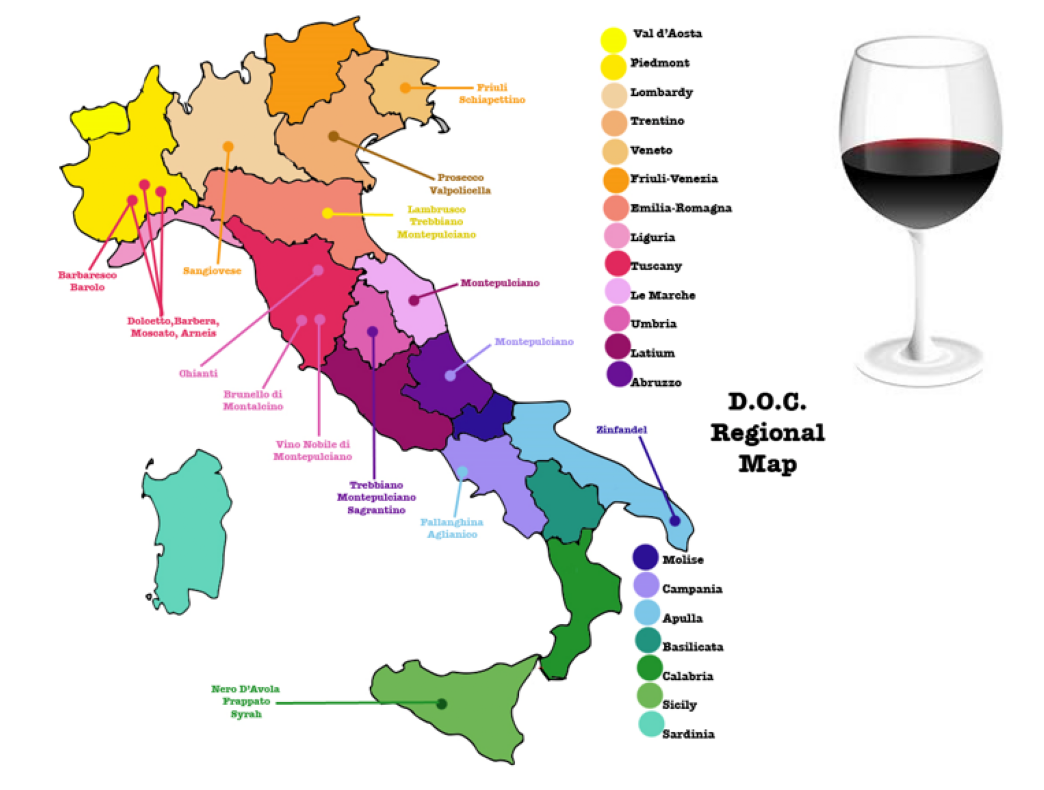

Number of rules (RP-WM): Mean=141.6; Stdev=0.49
Number of rules (RP-FDTP): Mean=46.2; Stdev=4.71
Number of rules (SP-WM): Mean=142.4; Stdev=0.49
Number of rules (SP-FDTP): Mean=36.4; Stdev=5.12
Number of rules (RP-WM-S): Mean=12.4; Stdev=1.02
Number of rules (RP-FDTP-S): Mean=11.6; Stdev=1.36
Number of rules (SP-WM-S): Mean=9.4; Stdev=2.24
Number of rules (SP-FDTP-S): Mean=10.6; Stdev=2.15
Number of leaves (Decision Tree): Mean=9.2; Stdev=2.4
Classification Ratio (RP-WM): Mean=0.77; Stdev=0.16
Classification Ratio (RP-FDTP): Mean=0.94; Stdev=0.03
Classification Ratio (SP-WM): Mean=0.46; Stdev=0.4
Classification Ratio (SP-FDTP): Mean=0.94; Stdev=0.08
Classification Ratio (RP-WM-S): Mean=0.93; Stdev=0.05
Classification Ratio (RP-FDTP-S): Mean=0.92; Stdev=0.06
Classification Ratio (SP-WM-S): Mean=0.94; Stdev=0.06
Classification Ratio (SP-FDTP-S): Mean=0.95; Stdev=0.07
Classification Ratio (Decision Tree): Mean=0.93; Stdev=0.03
Classification Ratio (Random Forest): Mean=0.98; Stdev=0.01


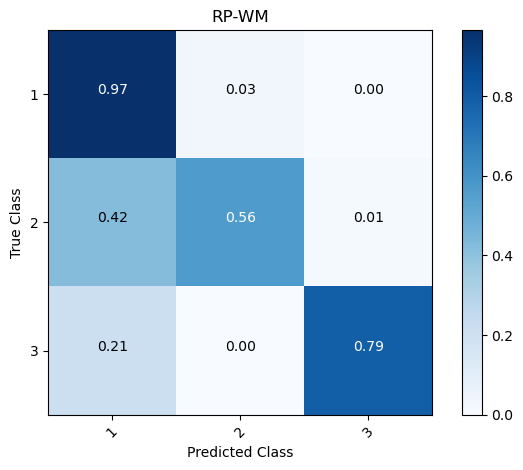

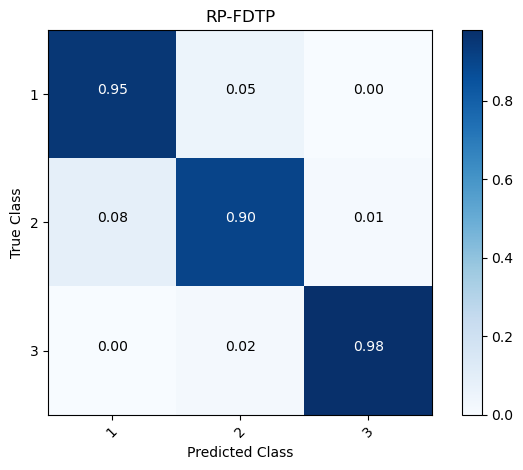

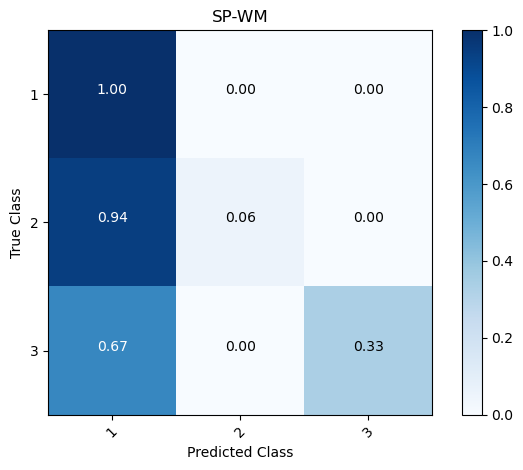

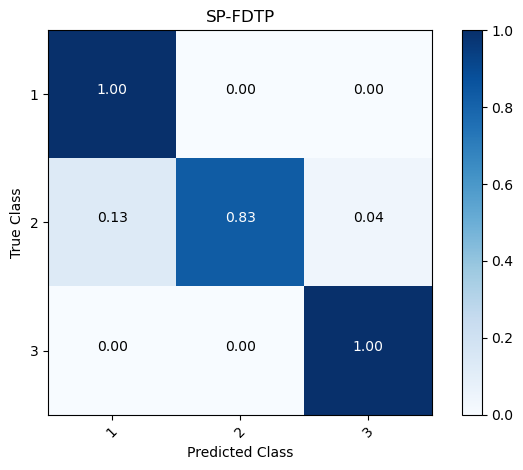

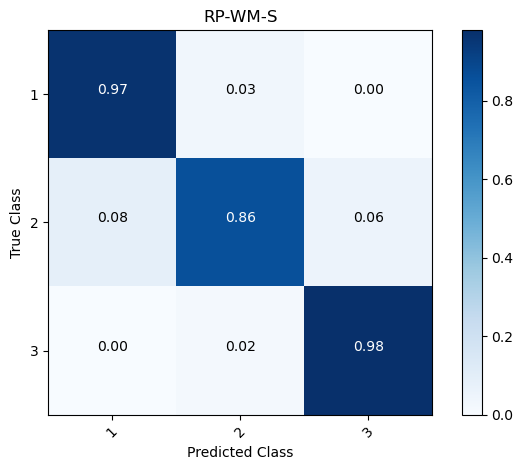

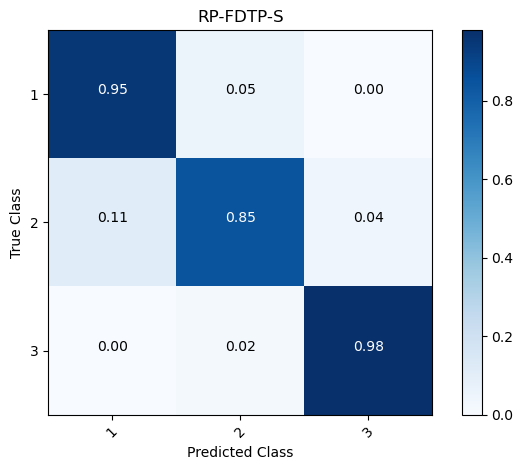

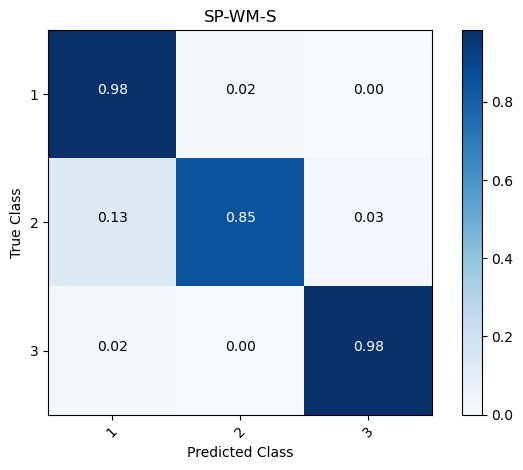

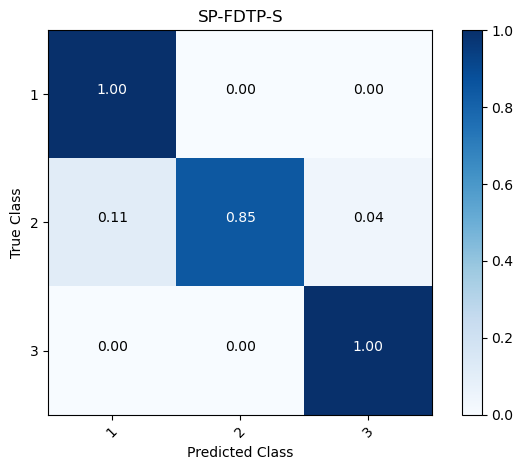

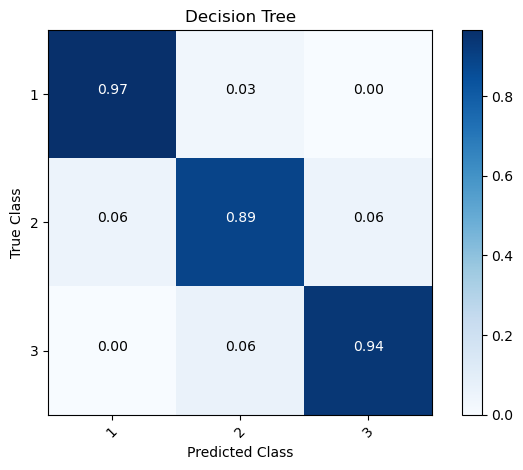

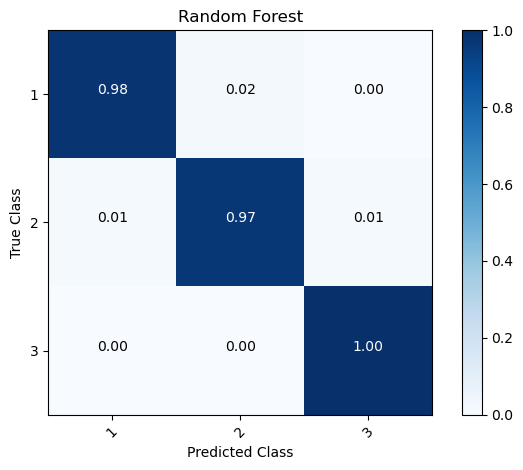

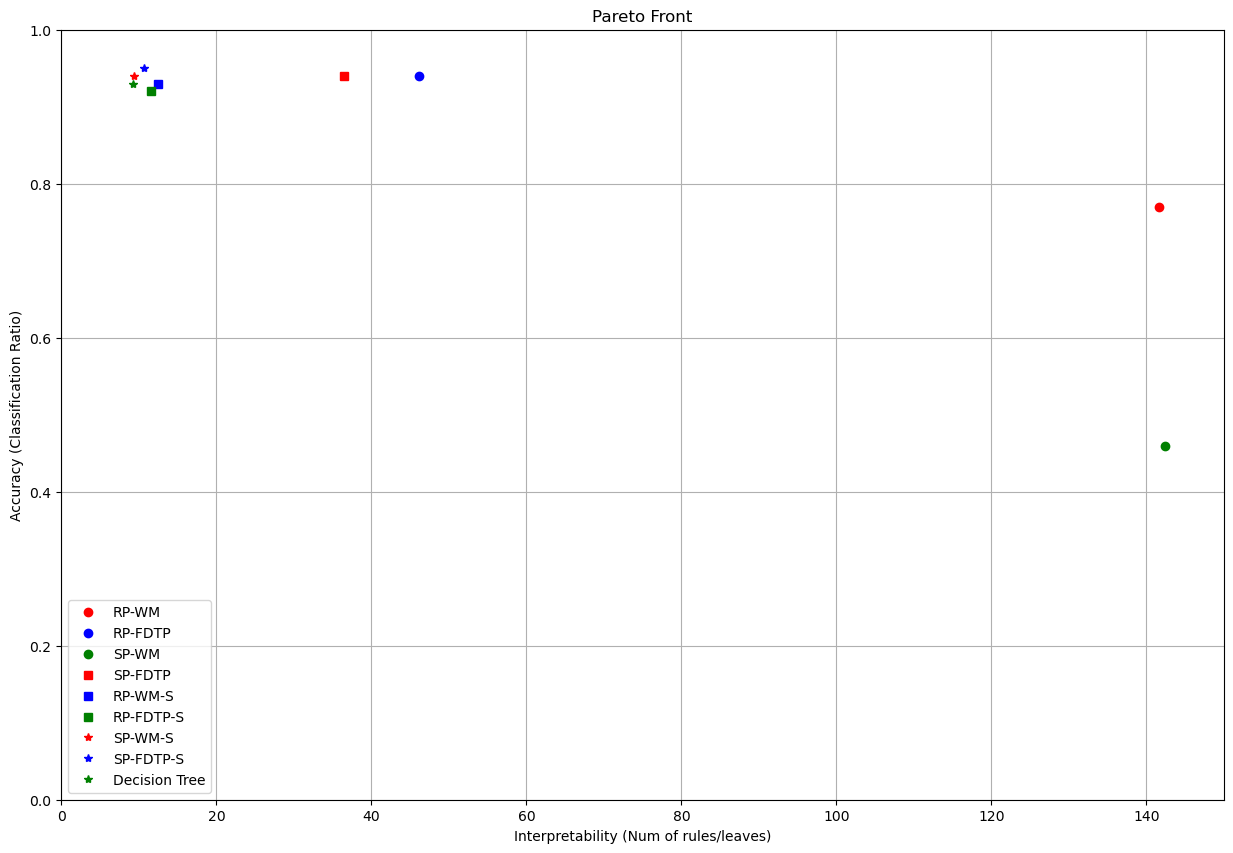

In [24]:
## this code is developed by Jose Maria Alonso-Moral
# WINE dataset
nFolds = 5
dfN= "WINE"
# plot static image
plot_png_file("testlib/WINE/wine.png")

fis_fil_names = ["WINE.txt.kb.xml.RP.kb.xml.WM.kb.xml.jfml.xml",
                 "WINE.txt.kb.xml.RP.kb.xml.FDTP.kb.xml.jfml.xml",
                 "WINE.txt.kb.xml.SP.kb.xml.WM.kb.xml.jfml.xml",
                 "WINE.txt.kb.xml.SP.kb.xml.FDTP.kb.xml.jfml.xml",
                 "WINE.txt.kb.xml.RP.kb.xml.WM.kb.xml.S.kb.xml.jfml.xml",
                 "WINE.txt.kb.xml.RP.kb.xml.FDTP.kb.xml.S.kb.xml.jfml.xml",
                 "WINE.txt.kb.xml.SP.kb.xml.WM.kb.xml.S.kb.xml.jfml.xml",
                 "WINE.txt.kb.xml.SP.kb.xml.FDTP.kb.xml.S.kb.xml.jfml.xml"]
                 
m_int,m_acc=cross_val_analysis(nFolds, dfN, ml_model_names, ml_models, fis_mod_names, fis_fil_names, wine_fnames, wine_out_target, wine_numClasses)
# Plot Interpretability-Accuracy Pareto Front: Fuzzy Systems and Decision Tree
#print(m_int)
#print(m_acc)
model_nam= []
for i in fis_mod_names:
  model_nam.append(i)

dt_idx= ml_model_names.index("Decision Tree")
model_nam.append(ml_model_names[dt_idx])
plt.figure(figsize=[15,10])
plot_pareto_front(m_int,m_acc,model_nam,150)

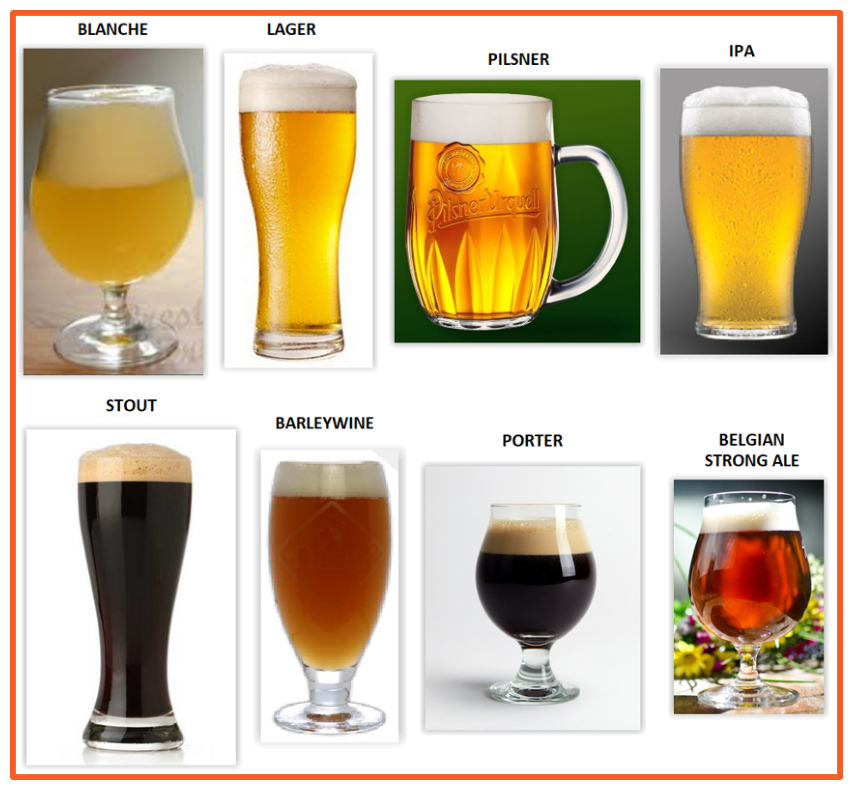

Number of rules (RP-WM): Mean=46.2; Stdev=1.17
Number of rules (RP-FDTP): Mean=26.0; Stdev=0.77
Number of rules (SP-WM): Mean=47.0; Stdev=3.03
Number of rules (SP-FDTP): Mean=25.8; Stdev=4.02
Number of rules (RP-WM-S): Mean=11.2; Stdev=2.93
Number of rules (RP-FDTP-S): Mean=8.4; Stdev=0.49
Number of rules (SP-WM-S): Mean=13.6; Stdev=2.15
Number of rules (SP-FDTP-S): Mean=11.4; Stdev=2.15
Number of rules (FURIA_W): Mean=14.2; Stdev=2.04
Number of leaves (Decision Tree): Mean=21.6; Stdev=1.69
Classification Ratio (RP-WM): Mean=0.88; Stdev=0.09
Classification Ratio (RP-FDTP): Mean=0.93; Stdev=0.06
Classification Ratio (SP-WM): Mean=0.92; Stdev=0.07
Classification Ratio (SP-FDTP): Mean=0.93; Stdev=0.07
Classification Ratio (RP-WM-S): Mean=0.91; Stdev=0.08
Classification Ratio (RP-FDTP-S): Mean=0.94; Stdev=0.06
Classification Ratio (SP-WM-S): Mean=0.92; Stdev=0.06
Classification Ratio (SP-FDTP-S): Mean=0.94; Stdev=0.07
Classification Ratio (FURIA_W): Mean=0.95; Stdev=0.05
Classification Rat

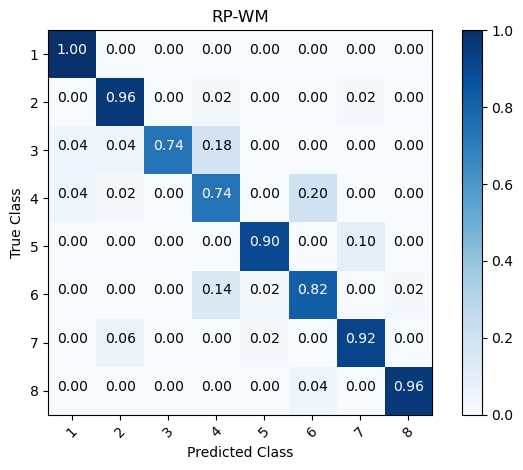

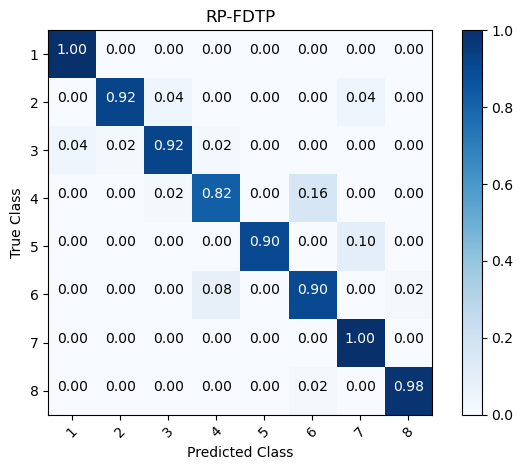

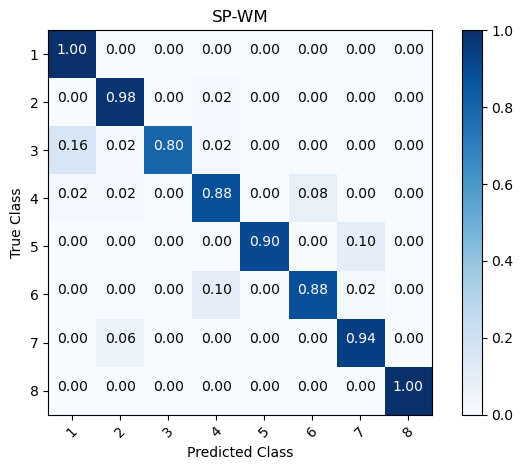

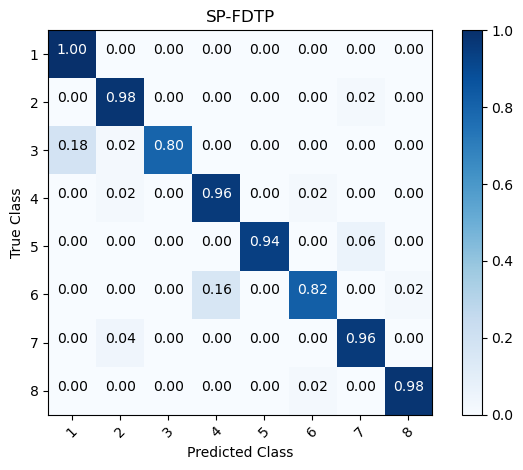

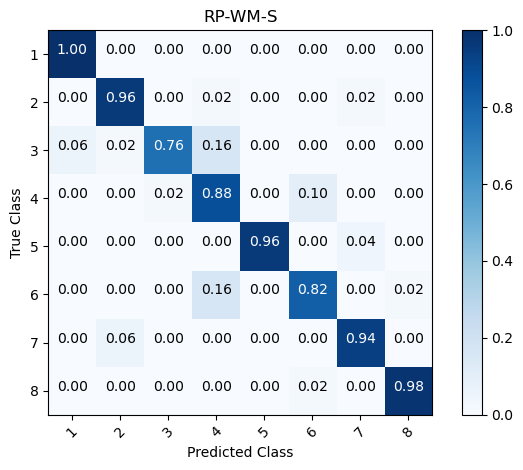

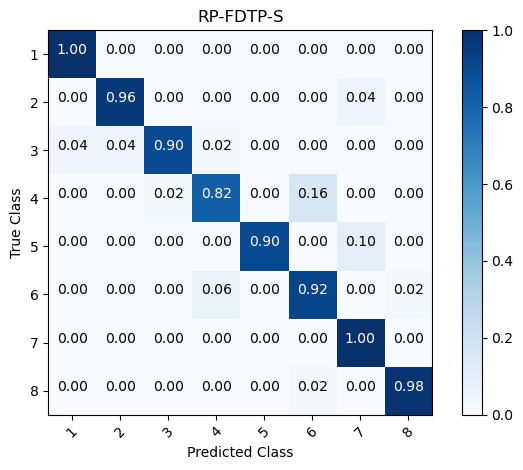

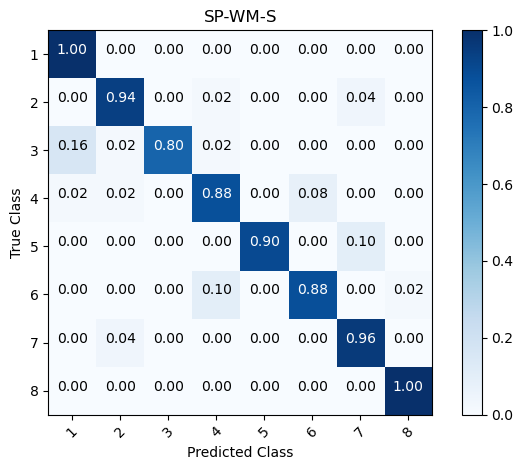

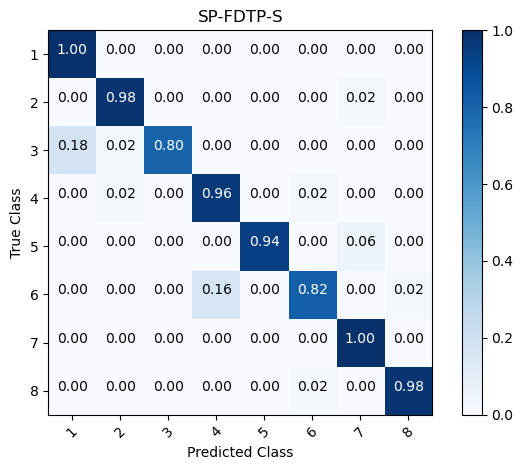

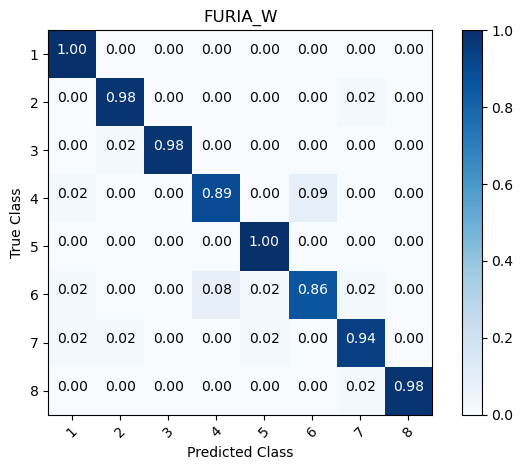

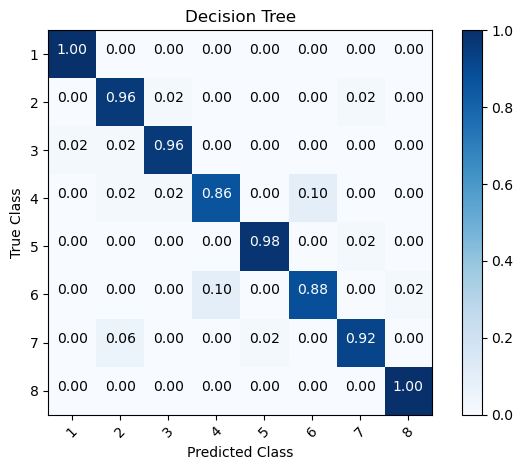

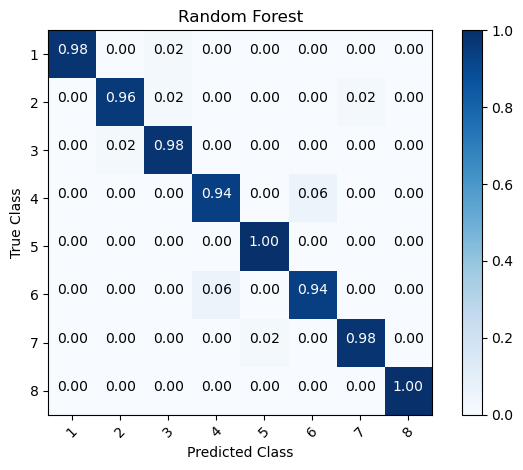

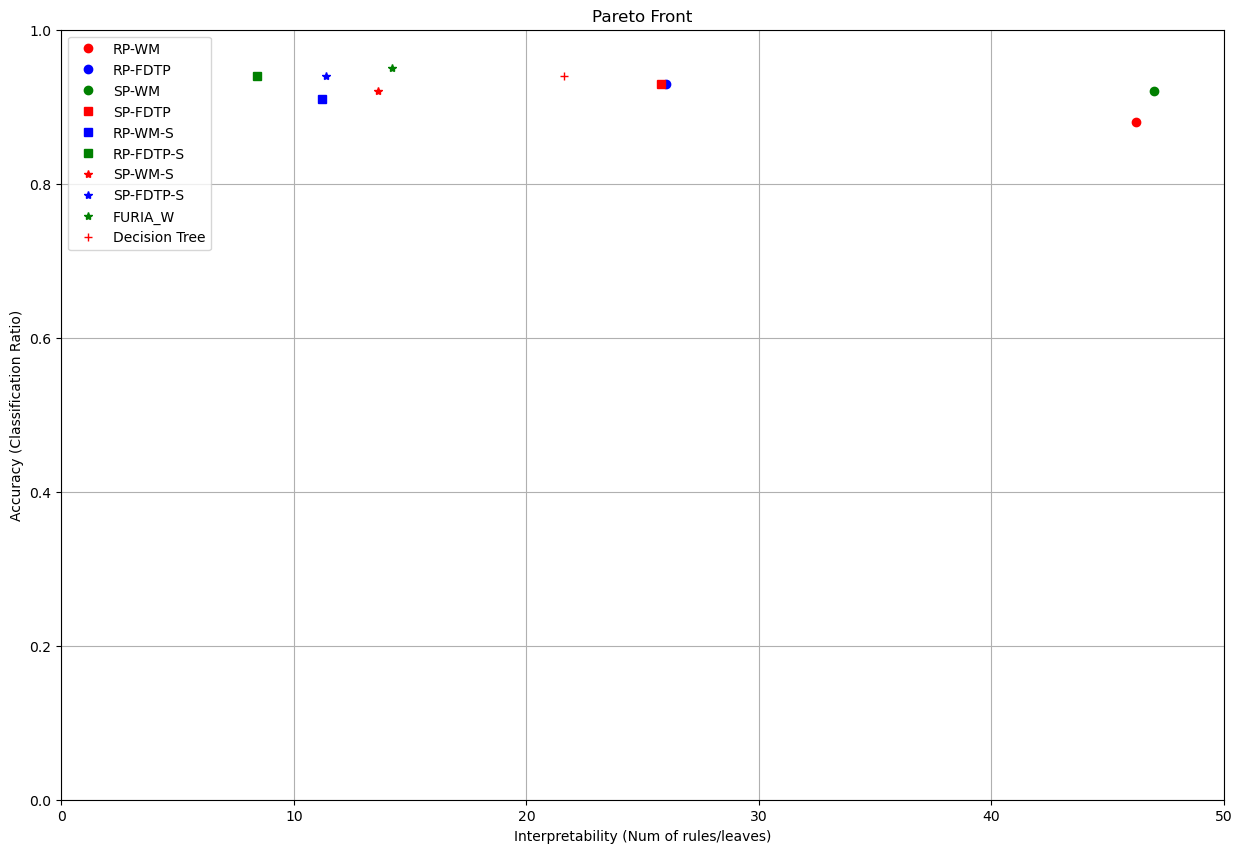

In [25]:
## this code is developed by Jose Maria Alonso-Moral
# BEER dataset
nFolds = 10
dfN="BEER"
# plot static image
plot_png_file("testlib/BEER/beer.png")

fis_mb_names= fis_mod_names + ["FURIA_W"]

#print(fis_m_names)
fis_fil_names = ["BEER.txt.kb.xml.RP.kb.xml.WM.kb.xml.jfml.xml",
                 "BEER.txt.kb.xml.RP.kb.xml.FDTP.kb.xml.jfml.xml",
                 "BEER.txt.kb.xml.SP.kb.xml.WM.kb.xml.jfml.xml",
                 "BEER.txt.kb.xml.SP.kb.xml.FDTP.kb.xml.jfml.xml",
                 "BEER.txt.kb.xml.RP.kb.xml.WM.kb.xml.S.kb.xml.jfml.xml",
                 "BEER.txt.kb.xml.RP.kb.xml.FDTP.kb.xml.S.kb.xml.jfml.xml",
                 "BEER.txt.kb.xml.SP.kb.xml.WM.kb.xml.S.kb.xml.jfml.xml",
                 "BEER.txt.kb.xml.SP.kb.xml.FDTP.kb.xml.S.kb.xml.jfml.xml",
                 "BEER.txt.kb.xml.RP.kb.xml.FURIA.W.kb.xml.jfml.xml"]

m_int,m_acc=cross_val_analysis(nFolds, dfN, ml_model_names, ml_models, fis_mb_names, fis_fil_names, beer_fnames, beer_out_target, beer_numClasses)
# Plot Interpretability-Accuracy Pareto Front: Fuzzy Systems and Decision Tree
#print(m_int)
#print(m_acc)
model_nam= []
for i in fis_mb_names:
  model_nam.append(i)

dt_idx= ml_model_names.index("Decision Tree")
model_nam.append(ml_model_names[dt_idx])
plt.figure(figsize=[15,10])
plot_pareto_front(m_int,m_acc,model_nam,50)

### **Exercise I1.3**

Regarding in detail the plots above for both WINE and BEER datasets, answer to the following questions (justify your response):

* Which is the most accurate system for each dataset?
* Which is the most interpretable system for each dataset?
* Which is the system with the best interpretability-accuracy trade-off for each dataset?
* Which is the system with the best generalization ability?

### **Building Fuzzy Rules with a Multiobjective Approach**

In this section, we show how to use [SKMoefs](https://github.com/GionatanG/skmoefs/), i.e., a Python module specifically built for Multi-Objective Evolutionary Fuzzy Systems. It takes inspiration by the Scikit-Learn principles and builds upon Platypus, a library that deals with multi-objective algorithms. We will work with the BEER dataset. Notice that, in the Pareto plots below, **trl** stands for Total Rule Length and counts for all premises in all rules.

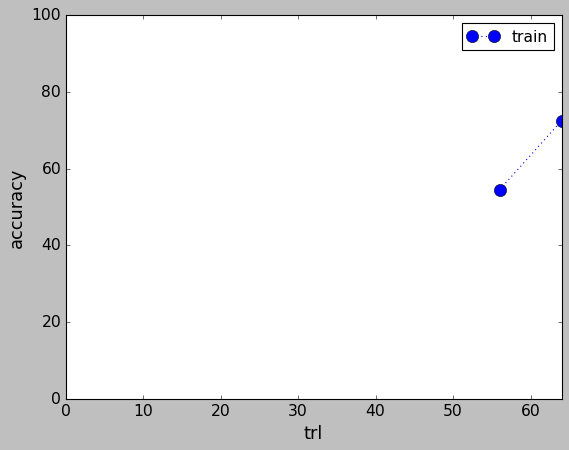

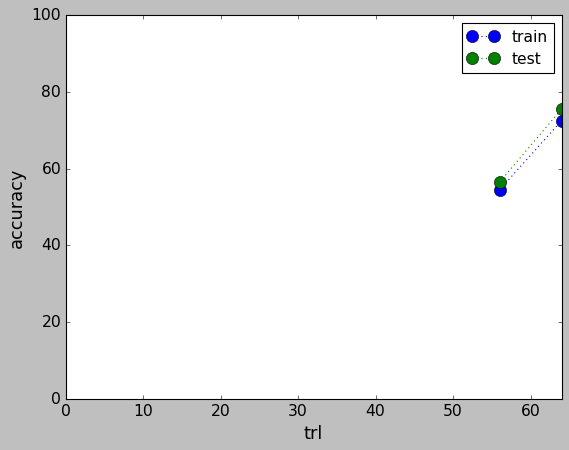

RULE BASE
1:	IF Color is L  AND Bitterness is VL THEN BeerStyle is 1
2:	IF Color is VL  AND Bitterness is L THEN BeerStyle is 3
3:	IF Color is L  AND Bitterness is L THEN BeerStyle is 3
4:	IF Color is VL  AND Bitterness is M THEN BeerStyle is 4
5:	IF Color is VL  AND Bitterness is H THEN BeerStyle is 4
6:	IF Color is VL  AND Bitterness is VH THEN BeerStyle is 4
7:	IF Color is M  AND Bitterness is VL THEN BeerStyle is 7
8:	IF Color is VL  AND Bitterness is L THEN BeerStyle is 3
9:	IF Color is L  AND Bitterness is L THEN BeerStyle is 2
10:	IF Color is M  AND Bitterness is L THEN BeerStyle is 6
11:	IF Color is VL  AND Bitterness is M THEN BeerStyle is 4
12:	IF Color is L  AND Bitterness is M THEN BeerStyle is 4
13:	IF Color is M  AND Bitterness is M THEN BeerStyle is 6
14:	IF Color is VL  AND Bitterness is H THEN BeerStyle is 4
15:	IF Color is L  AND Bitterness is H THEN BeerStyle is 4
16:	IF Color is L  AND Bitterness is VH THEN BeerStyle is 4
17:	IF Color is M  AND Bitterness is VL THEN

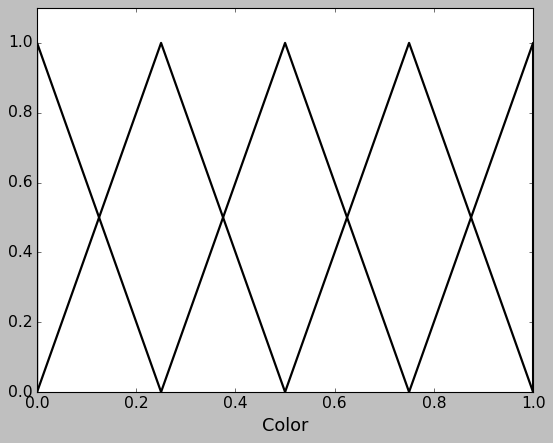

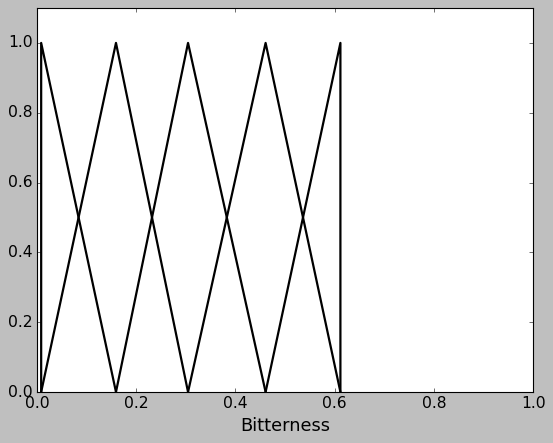

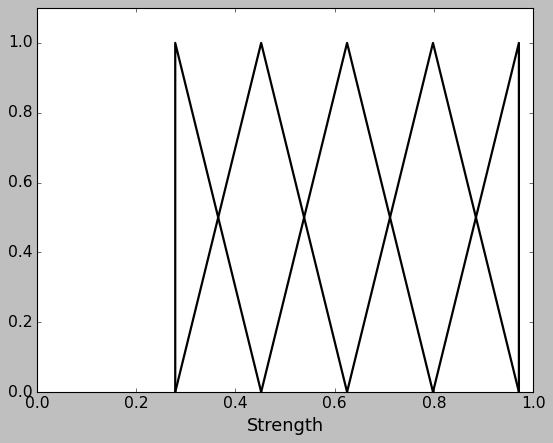

In [28]:
## this code is developed by Jose Maria Alonso-Moral
from platypus.algorithms import *

from skmoefs.toolbox import MPAES_RCS, load_dataset, normalize
from skmoefs.rcs import RCSInitializer, RCSVariator
from skmoefs.discretization.discretizer_base import fuzzyDiscretization
from sklearn.model_selection import train_test_split

X, y, attributes, inputs, outputs = load_dataset('beer')
X_n, y_n = normalize(X, y, attributes)
Xtr, Xte, ytr, yte = train_test_split(X_n, y_n, test_size=0.5)
my_moefs = MPAES_RCS(variator=RCSVariator(), initializer=RCSInitializer())
my_moefs.fit(Xtr, ytr, max_evals=10)

my_moefs.show_pareto()
my_moefs.show_pareto(Xte, yte)
my_moefs.show_model('median', inputs=inputs, outputs=outputs)

RULE BASE
1:	IF Color is L  AND Bitterness is VL THEN BeerStyle is 1
2:	IF Color is VL  AND Bitterness is L THEN BeerStyle is 3
3:	IF Color is L  AND Bitterness is L THEN BeerStyle is 3
4:	IF Color is VL  AND Bitterness is M THEN BeerStyle is 4
5:	IF Color is VL  AND Bitterness is H THEN BeerStyle is 4
6:	IF Color is VL  AND Bitterness is VH THEN BeerStyle is 4
7:	IF Color is VL  AND Bitterness is VL THEN BeerStyle is 1
8:	IF Color is L  AND Bitterness is VL THEN BeerStyle is 2
9:	IF Color is M  AND Bitterness is VL THEN BeerStyle is 7
10:	IF Color is VL  AND Bitterness is L THEN BeerStyle is 3
11:	IF Color is L  AND Bitterness is L THEN BeerStyle is 2
12:	IF Color is M  AND Bitterness is L THEN BeerStyle is 6
13:	IF Color is VL  AND Bitterness is M THEN BeerStyle is 4
14:	IF Color is L  AND Bitterness is M THEN BeerStyle is 4
15:	IF Color is M  AND Bitterness is M THEN BeerStyle is 6
16:	IF Color is VL  AND Bitterness is H THEN BeerStyle is 4
17:	IF Color is L  AND Bitterness is H THE

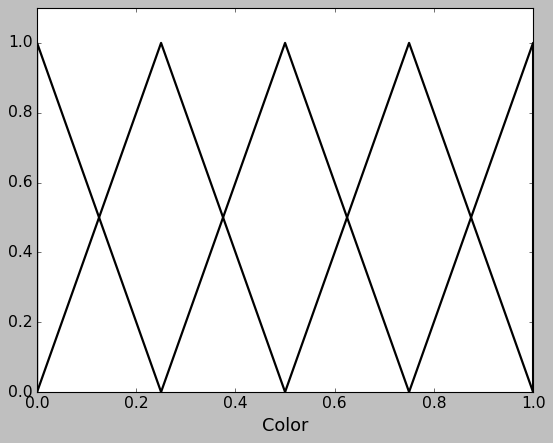

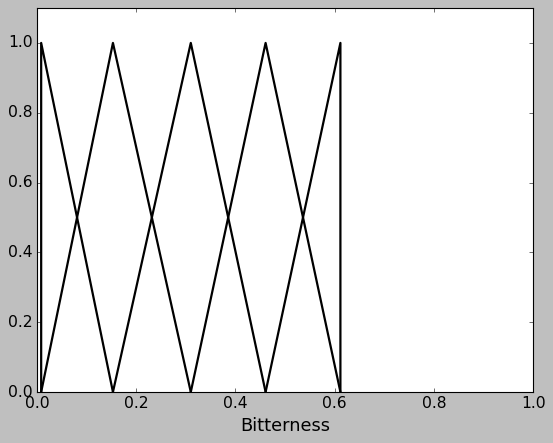

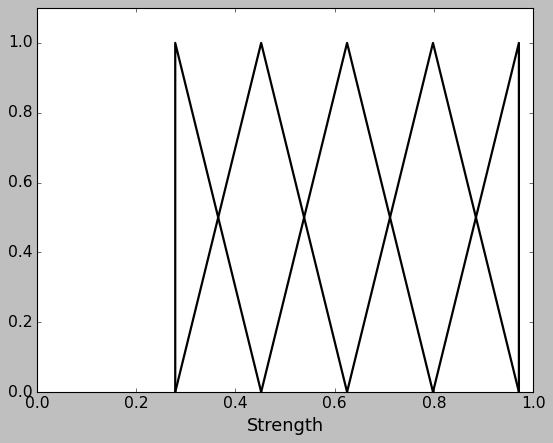

In [29]:
## this code is developed by Jose Maria Alonso-Moral
my_moefs.show_model('first', inputs=inputs, outputs=outputs)

RULE BASE
1:	IF Color is L  AND Bitterness is VL THEN BeerStyle is 1
2:	IF Color is VL  AND Bitterness is L THEN BeerStyle is 3
3:	IF Color is L  AND Bitterness is L THEN BeerStyle is 3
4:	IF Color is VL  AND Bitterness is M THEN BeerStyle is 4
5:	IF Color is VL  AND Bitterness is H THEN BeerStyle is 4
6:	IF Color is VL  AND Bitterness is VH THEN BeerStyle is 4
7:	IF Color is M  AND Bitterness is VL THEN BeerStyle is 7
8:	IF Color is VL  AND Bitterness is L THEN BeerStyle is 3
9:	IF Color is L  AND Bitterness is L THEN BeerStyle is 2
10:	IF Color is M  AND Bitterness is L THEN BeerStyle is 6
11:	IF Color is VL  AND Bitterness is M THEN BeerStyle is 4
12:	IF Color is L  AND Bitterness is M THEN BeerStyle is 4
13:	IF Color is M  AND Bitterness is M THEN BeerStyle is 6
14:	IF Color is VL  AND Bitterness is H THEN BeerStyle is 4
15:	IF Color is L  AND Bitterness is H THEN BeerStyle is 4
16:	IF Color is L  AND Bitterness is VH THEN BeerStyle is 4
17:	IF Color is M  AND Bitterness is VL THEN

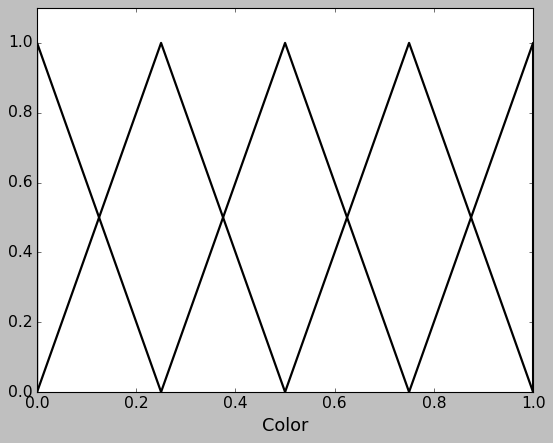

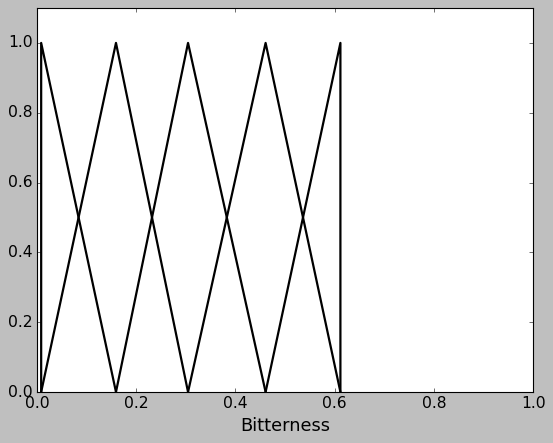

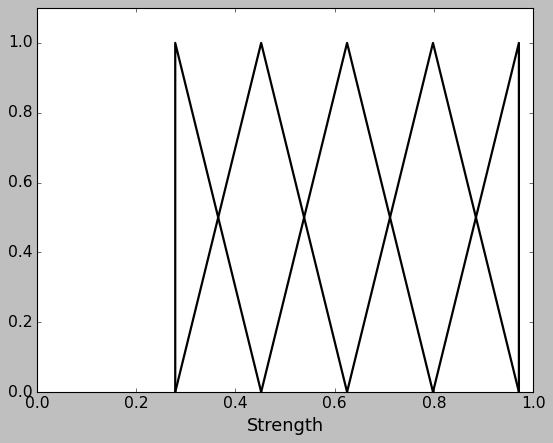

In [30]:
## this code is developed by Jose Maria Alonso-Moral
my_moefs.show_model('last', inputs=inputs, outputs=outputs)

In [31]:
## this code is developed by Jose Maria Alonso-Moral
# Test instance
print(len(Xte))
print(Xte[10]) # values of test instance 10
print(yte[10]) # expected output for test instance 10
my_moefs.predict(Xte[0:1],position="median")

200
[0.04444444 0.04545455 0.37857143]
1


array([5.])

In [32]:
## this code is developed by Jose Maria Alonso-Moral
# inference with the first rule base for the test instances 10
my_moefs.predict(Xte[10:11],position="first")

array([1.])

In [33]:
## this code is developed by Jose Maria Alonso-Moral
# inference with the last rule base for the test instances 10
my_moefs.predict(Xte[10:11],position="last")

array([3.])

In [34]:
## this code is developed by Jose Maria Alonso-Moral
# Reversing the normalization of test instance
print(float(0+Xte[10][0]*45))
print(float(8+Xte[10][1]*242))
print(float(0+Xte[10][2]*0.14))

2.0
19.0
0.053


In [35]:
## this code is developed by Jose Maria Alonso-Moral
jfml_str_xml_beer = "testlib/BEER/training/BEER.txt.kb.xml.RP.kb.xml.FDTP.kb.xml.S.kb.xml.jfml.xml";

fs_RP_FDTP_S_beer = Py4jfml.load(jfml_str_xml_beer)
print(fs_RP_FDTP_S_beer)

vars = fs_RP_FDTP_S_beer.getVariables()
vars[0].setValue(float(0+Xte[10][0]*45))
vars[1].setValue(float(8+Xte[10][1]*242))
vars[2].setValue(float(0+Xte[10][2]*0.14))

fs_RP_FDTP_S_beer.evaluate()
beerClass = fs_RP_FDTP_S_beer.getVariable("Class")
beer_inf_value = beerClass.getValue()
print(" ")
print("Actual output -> " + str(float(yte[10])))
print("INFRENCE RESULTS Fuzzy System")
print(" (INPUT): " + str(vars[0].getName()) + "=" + str(vars[0].getValue()) +", "+ str(vars[1].getName()) + "=" + str(vars[1].getValue()) +", "+ str(vars[2].getName()) + "=" + str(vars[2].getValue()))
print(" (OUTPUT): " + str(beerClass.getName()) + "=" + str(beer_inf_value) + " ("+beer_class_names[round(beer_inf_value)-1]+")")
print(fs_RP_FDTP_S_beer)


FUZZY SYSTEM: New Knowledge Base - MAMDANI
KNOWLEDGEBASE: 
  *Color - domain[0.0, 45.0] - input
	Pale -  trapezoid [a: 0.0, b: 0.0, c: 0.0, d: 9.0]
	Straw -  triangular [a: 0.0, b: 9.0, c: 18.0]
	Amber -  triangular [a: 9.0, b: 18.0, c: 27.0]
	Brown -  triangular [a: 18.0, b: 27.0, c: 36.0]
	Black -  trapezoid [a: 27.0, b: 36.0, c: 45.0, d: 45.0]
	(Straw) OR (Amber) -  trapezoid [a: 0.0, b: 9.0, c: 18.0, d: 27.0]
	(Amber) OR (Brown) -  trapezoid [a: 9.0, b: 18.0, c: 27.0, d: 36.0]

  *Bitterness - domain[8.0, 250.0] - input
	Low -  trapezoid [a: 8.0, b: 8.0, c: 8.0, d: 56.4]
	High -  trapezoid [a: 8.0, b: 56.4, c: 250.0, d: 250.0]

  *Strength - domain[0.039, 0.136] - input
	Session -  trapezoid [a: 0.039, b: 0.039, c: 0.039, d: 0.058]
	Standard -  triangular [a: 0.039, b: 0.058, c: 0.078]
	High -  triangular [a: 0.058, b: 0.078, c: 0.097]
	Very high -  trapezoid [a: 0.078, b: 0.097, c: 0.136, d: 0.136]
	(Session) OR (Standard) -  trapezoid [a: 0.039, b: 0.039, c: 0.058, d: 0.078]
	(H

### **Exercise I1.4**

Make a comparison of the RP_FDTP_S model with the first and last fuzzy rule-based systems in the Pareto front generated by SKMoefs, answer to the following questions (justify your response):

* Which is the most accurate system?
* Which is the most interpretable system?
* Which is the system with the best interpretability-accuracy trade-off?